# ML Auto N With New Linear Regression.ipynb

## Gyors link
[set](#set) [exp](#exp) [run](#run) [dev](#dev) [pst](#pst) [str](#str) [zip](#zip) [mp4](#mp4) [tst](#tst)

**ToDo:**

Az eredeti cikkre alapozott Linearis egyenlet számítást fogom használni.

Ehhez csináltam egy másik cars.py modult carswithgoodregression.py néven.

<font color="#FF0000">Ebben a notebookban ezt az új modult fogom használni.</font>

Shift + Tab ( a signaturához )

Shift + B ( sandbox )

# Korábbi PNG fájlok törlése

In [1]:
!rm *.png
!rm *.zip

rm: cannot remove '*.png': No such file or directory
rm: cannot remove '*.zip': No such file or directory


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm

from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler

import os
import sys
import pickle
import importlib

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from IPython.display import clear_output

import warnings
warnings.filterwarnings('ignore')


In [61]:
%%capture
!rm MLPPlot.py
!rm environments.py
!rm plotters.py
!rm debils.py
!rm cars.py
!rm carswithgoodregression.py
!rm dev.py
!rm *.py.*
!rm *.pkl
!rm *.png

!wget --no-cache https://raw.githubusercontent.com/JoDeMiro/Micado-Research/main/MLPPlot.py
!wget --no-cache https://raw.githubusercontent.com/JoDeMiro/TMP2/main/debils.py
!wget --no-cache https://raw.githubusercontent.com/JoDeMiro/TMP2/main/environments.py
!wget --no-cache https://raw.githubusercontent.com/JoDeMiro/TMP2/main/plotters.py
!wget --no-cache https://raw.githubusercontent.com/JoDeMiro/TMP2/main/storages.py
!wget --no-cache https://raw.githubusercontent.com/JoDeMiro/TMP2/main/cars.py
!wget --no-cache https://raw.githubusercontent.com/JoDeMiro/TMP2/main/carswithgoodregression.py
!wget --no-cache https://raw.githubusercontent.com/JoDeMiro/TMP2/main/dev.py
!wget --no-cache https://raw.githubusercontent.com/JoDeMiro/TMP2/main/neural.py

# !curl -H 'Pragma: no-cache' https://raw.githubusercontent.com/JoDeMiro/TMP/main/cars.py --output cars.py


In [63]:
import MLPPlot
from MLPPlot import DrawNN

from debils import Printer
from environments import Road
from plotters import PostPlotter, Plotter
from storages import Storage
# from carswithgoodregression import TestCar, Car
from carswheel import TestCar, Car
from neural import NeuralisHalo
import dev

# Base case

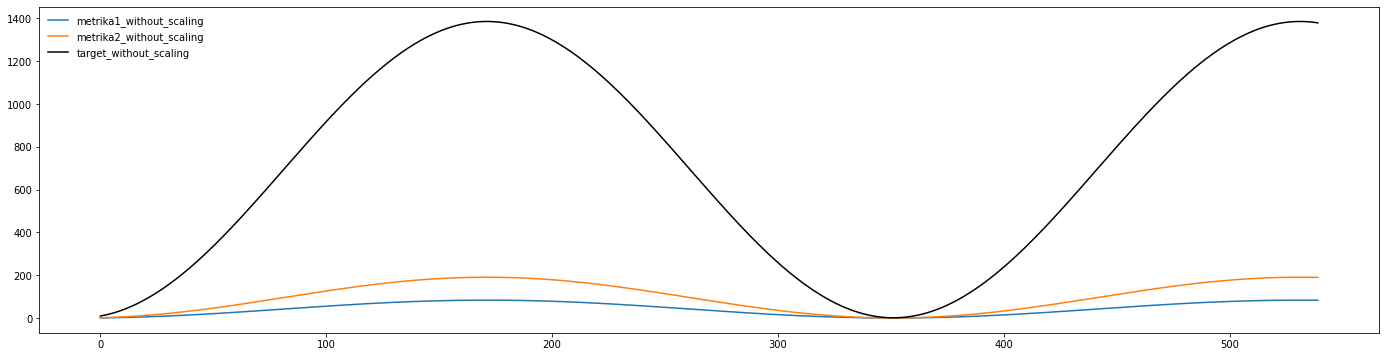

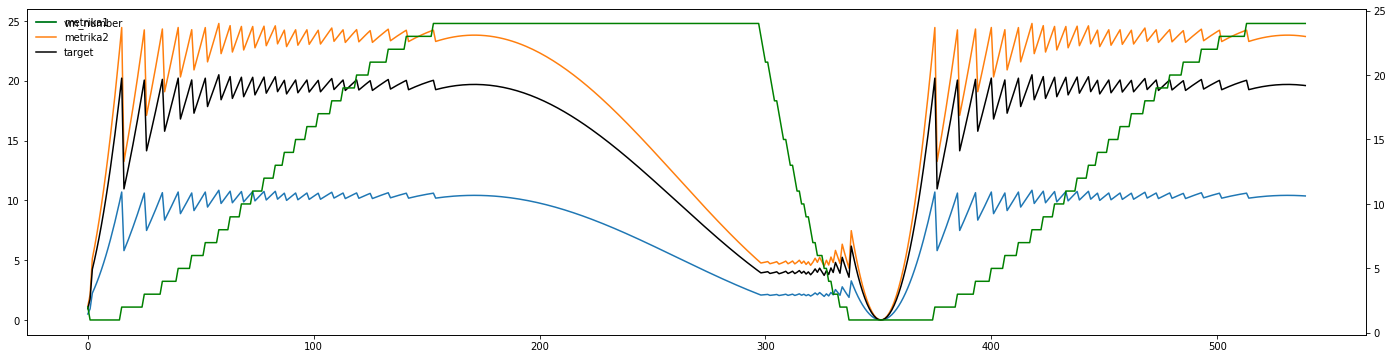

In [58]:
# Van egy vonal ez a terhelés, ez az egyetlen olyan idővonal amit statikusan előre a teljes teszt hosszára meghatározok

# --> ez megy majd a road osztályba de nem ez lesz a center, amit majd átnevezek targetre, ez request néven fog futni
hossz   = np.arange(0, 540, 1)
request_array = np.sin(30 + hossz/180*np.pi) * 1000 + 1000

# plot
# plt.plot(request_array); plt.show()

# van két metrika de ezek dinamikusan álnak elő a vm-ek és a terhelés függvényében

def jobb_oldali_metrika(vm_number, request):
    # a metrika1 meg úgy áll elő, hogy terhelés (ez az egyetlen vonal ami adott) * vm (self.y) * 8
    metrika = request / (vm_number * 8)
    return metrika

def bal_oldali_metrika(vm_number, request):
    # a metrika2 meg úgy áll elő, hogy terhelés (ez az egyetlen vonal ami adott) * vm (self.y) * 3.5
    metrika = request / (vm_number * 3.5)
    return metrika

def target_metrika(metrika1, metrika2):
    # (metrika1*4 + metrika2*9) / 13 ez az út ami elő áll és rá akarjuk mappelni az autot
    target = (metrika1 * 4 + metrika2 * 9) / 13
    return target


# run
vm_number = 3
metrika1_history  = []
metrika2_history  = []
target_history    = []
vm_number_history = []

vm_fixed_number = 3
metrika1_without_scaling_history = []
metrika2_without_scaling_history = []
target_without_scaling_history   = []
action_type = 'primitiv'
for i in range(540):
    request = request_array[i]
    
    metrika1_without_scaling_history.append(jobb_oldali_metrika(vm_fixed_number, request))
    metrika2_without_scaling_history.append(bal_oldali_metrika(vm_fixed_number, request))
    target_without_scaling_history.append(target_metrika(vm_fixed_number, request))
    
    metrika1 = jobb_oldali_metrika(vm_number, request)
    metrika2 = bal_oldali_metrika(vm_number, request)
    target   = target_metrika(metrika1, metrika2)
    metrika1_history.append(metrika1)
    metrika2_history.append(metrika2)
    target_history.append(target)
    
    # Action rész
    if( action_type == 'primitiv' ):
        if target > 20:
            vm_number += 1
        if target < 4:
            vm_number += -1
            pass
        vm_number = 1 if vm_number < 1 else vm_number
        vm_number = 30 if vm_number > 30 else vm_number
    
    # Tárolás
    vm_number_history.append(vm_number)

plt.figure(figsize=(24, 6))
plt.plot(metrika1_without_scaling_history, label='metrika1_without_scaling');
plt.plot(metrika2_without_scaling_history, label='metrika2_without_scaling');
plt.plot(target_without_scaling_history, label='target_without_scaling', c='black');
plt.legend(frameon=False);plt.show()


fig, ax = plt.subplots(figsize=(24, 6))
ax.plot(metrika1_history, label='metrika1');
ax.plot(metrika2_history, label='metrika2');
ax.plot(target_history, label='target', c='black');
ax2 = ax.twinx()
ax2.plot(vm_number_history, label='vm_number', c='green')
ax.legend(frameon=False);ax2.legend(frameon=False);plt.show()


# Sencond case

Megpróbálom bele rakni a tanulási logikát

In [ ]:
# Van egy vonal ez a terhelés, ez az egyetlen olyan idővonal amit statikusan előre a teljes teszt hosszára meghatározok

# --> ez megy majd a road osztályba de nem ez lesz a center, amit majd átnevezek targetre, ez request néven fog futni
hossz = np.arange(0, 540, 1)
request_array = np.sin(30 + hossz/180*np.pi) * 1000 + 1000

# plot
# plt.plot(request_array); plt.show()

# van két metrika de ezek dinamikusan álnak elő a vm-ek és a terhelés függvényében


def jobb_oldali_metrika(vm_number, request):
    # a metrika1 meg úgy áll elő, hogy terhelés (ez az egyetlen vonal ami adott) * vm (self.y) * 8
    metrika = request / (vm_number * 8)
    return metrika


def bal_oldali_metrika(vm_number, request):
    # a metrika2 meg úgy áll elő, hogy terhelés (ez az egyetlen vonal ami adott) * vm (self.y) * 3.5
    metrika = request / (vm_number * 3.5)
    return metrika


def target_metrika(metrika1, metrika2):
    # (metrika1*4 + metrika2*9) / 13 ez az út ami elő áll és rá akarjuk mappelni az autot
    target = (metrika1 * 4 + metrika2 * 9) / 13
    return target



# run
vm_number = 3
metrika1_history = []
metrika2_history = []
target_history = []
vm_number_history = []

vm_fixed_number = 3
metrika1_without_scaling_history = []
metrika2_without_scaling_history = []
target_without_scaling_history = []
action_type = 'primitiv'
for i in range(540):
    request = request_array[i]

    metrika1_without_scaling_history.append(
        jobb_oldali_metrika(vm_fixed_number, request))
    metrika2_without_scaling_history.append(
        bal_oldali_metrika(vm_fixed_number, request))
    target_without_scaling_history.append(
        target_metrika(vm_fixed_number, request))

    metrika1 = jobb_oldali_metrika(vm_number, request)
    metrika2 = bal_oldali_metrika(vm_number, request)
    target = target_metrika(metrika1, metrika2)
    metrika1_history.append(metrika1)
    metrika2_history.append(metrika2)
    target_history.append(target)

    # Nem kell semmilyen távolságot mérnie. Egyszerűen a metrika értéke a bemenete a Neurális hálónak

    # Action rész
    if(action_type == 'primitiv'):
        if target > 20:
            vm_number += 1
        if target < 4:
            vm_number += -1
            pass
        vm_number = 1 if vm_number < 1 else vm_number
        vm_number = 30 if vm_number > 30 else vm_number

    # Tárolás
    vm_number_history.append(vm_number)

plt.figure(figsize=(24, 6))
plt.plot(metrika1_without_scaling_history, label='metrika1_without_scaling')
plt.plot(metrika2_without_scaling_history, label='metrika2_without_scaling')
plt.plot(target_without_scaling_history,
         label='target_without_scaling', c='black')
plt.legend(frameon=False)
plt.show()


fig, ax = plt.subplots(figsize=(24, 6))
ax.plot(metrika1_history, label='metrika1')
ax.plot(metrika2_history, label='metrika2')
ax.plot(target_history, label='target', c='black')
ax2 = ax.twinx()
ax2.plot(vm_number_history, label='vm_number', c='green')
ax.legend(frameon=False)
ax2.legend(frameon=False)
plt.show()

# Set

<a name="set"></a> set [exp](#exp) [run](#run) [dev](#dev) [pst](#pst) [str](#str) [zip](#zip) [mp4](#mp4) [tst](#tst)


In [34]:
# A Road osztály az environment.py modulban van

# Sok féle utat lehet létrehozni a tesztekhez, a Road objektumnak van egy show metodusa amivel ki lehet plottolni az utat.

# -

# test_road = Road(wide = 124, length = 1000)
# test_road.show(height=5)

# -

# test_road = Road(wide = 124, length = 1000)
# test_road.wizu()

# -

# Mindeféle dolgkokat kipróbálunk az 'úttal' kapcsolatban, akár úgy, hogy az egyik, vagy mindkét szenzor determinisztikus
# kapcsolatban van a cél változóval, vagy úgy, hogy ne legyen determinisztikus a kapcsolat, alább látható néhány próba

## Experiment

<a name="exp"></a> [set](#set) exp [run](#run) [dev](#dev) [pst](#pst) [str](#str) [zip](#zip) [mp4](#mp4) [tst](#tst)


480
1920
# ----------------------------------------- road Description -----------------------------------------
  		 road.length =  2400
  		 minimum slope (descending) =  -25.752297723857254
  		 maximum slope (ascending)  =   22.525548489697485
# ----------------------------------------------------------------------------------------------------
---------------------------- HELLO --------------------------
---------------------- ÚJ AUTO VAGYOK :)) -------------------
self.distance_right_from_wall =  -35.189660093415114
self.distance_left_from_wall  =  -64.81033990658489


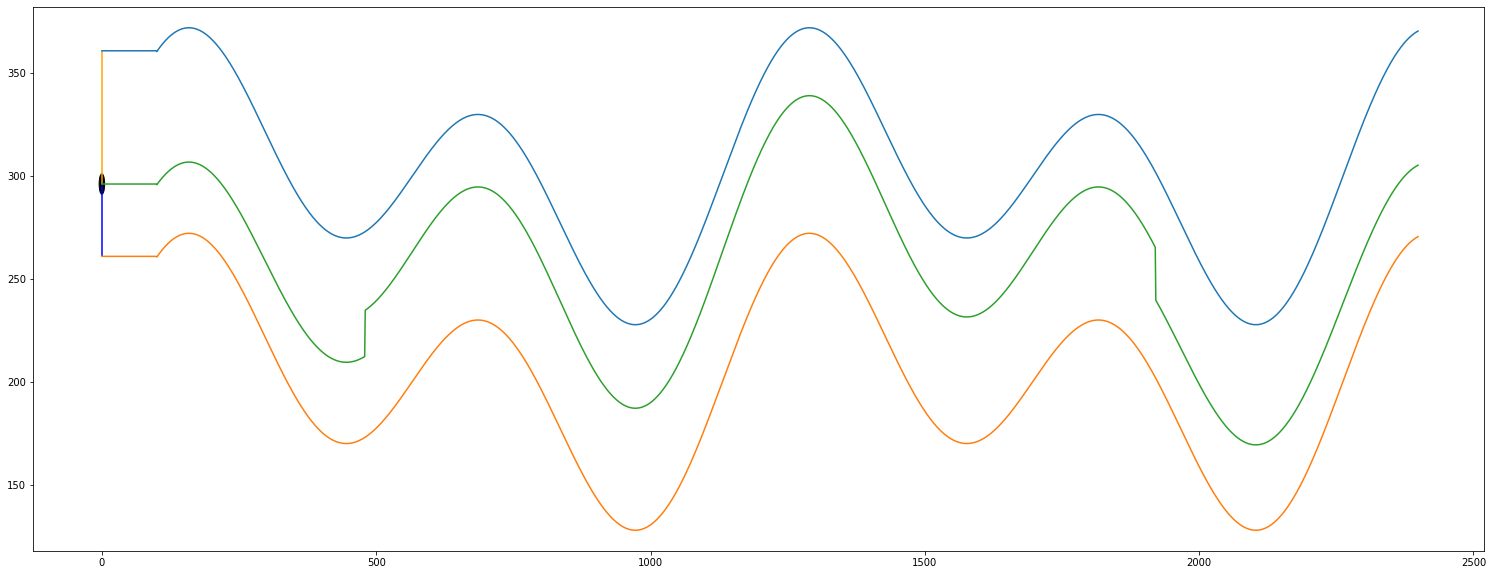

In [35]:
# road = Road(wide = 100, length = 1200, type = 99, v = 50, shift = 3)       # shift  left
# road = Road(wide = 100, length = 1200, type = 98, v = 50, strech = 3)      # strech(main wave)  left
# road = Road(wide = 100, length = 1200, type = 97, v = 50, strech = 300)    # strech(main wave)  left
# road = Road(wide = 100, length = 1200, type = 96, v = 50, strech = 2)      # strech(all wave)  left

# road = Road(wide = 200, length = 1200, type = 95, v = 50, shift = 100, strech = 0)      # center = (l + r) / 2
# road = Road(wide = 200, length = 2400, type = 95, v = 50, shift = 100, strech = 0)      # center = (l + r) / 2
# road = Road(wide = 200, length = 2400, type = 95, v = 50, shift = 100, strech = 10)     # center = (l + r) / 2
# road = Road(wide = 200, length = 2400, type = 95, v = 50, shift = 100, strech = 20)     # center = (l + r) / 2

# Ez már nem determinisztikus (b = 100) --> folyamatosan emeli a középvonalat

# Kiiktattam a középső szenzort -> ezekhet a kísérletekhez
# road = Road(wide = 200, length = 2400, type = 89, v = 50, shift = 100, strech = 20, noise=0, b=100)    # linear elevation

# Concept drift :)
# road = Road(wide = 100, length = 2400, type = 79, v = 50, shift = 0, strech = 0, noise=0, b=0, cdr = 0.2) # cdr = con.drf.rate

# Concept drift két drifttel :)
road = Road(wide = 100, length = 2400, type = 78, v = 50, shift = 0, strech = 0, noise=0, b=0, cdr = 0.2) # cdr = con.drf.rate

# Random Walk :)
# road = Road(wide = 100, length = 1200, type = 69, v = 50, strech = 2)

# mindez a sok jó eredmény azért lehetséges, mert az út maga még mindíg determinisztikus kapcsolatban áll az egyik fallal (!)
plotter = Plotter()
storage = Storage()
printer = Printer()
auto = Car(road, plotter, storage, printer)

# ---------------------------------- Ezek a vizsgált beállítások --------------------------------
auto.sensor_center_enable = False                 # <------------ kikapcsoltam a középső szenzort
auto.action_take_when.keys()
auto.action_take = 'i % 3 == 2'                   # a tanulás során mikor hajthat végre lépést!
auto.action_zero_is_allowed = False               # bekerülhet-e 0-s action a before-afterbe
auto.linear_regression_calculation = 'new'        # 'old', 'new'

# ---------------------------------- Kis etimológiai kitekintő ----------------------------------

# Amikor neki álltam a program írásának Kr.e. 15-ben akkor az volt az elképzelésem, hogy amikor
# tanul akkor nem léphet és fordítva amikor lép akkor nem tanulhat.

# A megfontolás az, hogy a tanulás során ne kaphasson olyan adatot ami a jelen állapotból származik
# Azonban ez az elképzelés több szempontból is hibás. Egyrészt nyugodtan kaphat.
# Másrészt úgy írtam meg, hogy a tanulás van előbb aztán a lépés, tehát nincs
# logikai buktató abban, ha ugyan abban a körben tanul és lép is egyszerre.

# Ez annó egy fejlesztési csökevényként benne maradt, de mint 'örökséget'
# tovább görgettem és szoktam vizsgálgatni a futásra gyakorolt hatását.

auto.calculate_distances()
auto.plot_history(1)

# Car Plot Setup

<a name="cpl"></a> [set](#set) [exp](#exp) [run](#run) [dev](#dev) [pst](#pst) [str](#str) [zip](#zip) [tst](#tst)


In [36]:
auto.plot_frequency = 27
auto.plot_detailed_frequency = 4 #32
auto.plot_history_flag = 0                          # 0 - disable, 1 - plot, 2 - save, 3 - both
auto.plot_investigation_flag = 0                    # 0 - disable, 1 - plot, 2 - save, 3 - both   > detailed_frequency
auto.plot_before_after_sensor_values_flag = 0       # 0 - disable, 1 - plot, 2 - save, 3 - both
auto.plot_before_after_sensor_estimation_flag = 0   # 0 - disable, 1 - plot, 2 - save, 3 - both
auto.plot_state_space_discover_flag = 0             # 0 - disable, 1 - plot, 2 - save, 3 - both
auto.plot_trace_flag = 0                            # 0 - disable, 1 - plot, 2 - save, 3 - both
auto.plotter_flag = 0                               # 0 - disable, 1 - plot, 2 - save, 3 - both   > timeline sensors
auto.plotter_switch = [6]                           # [] - none, [1], [1,2], [1,3], [99] - all
auto.plotter_mlp_flag = 0                           # 0 - disable, 1 - plot, 2 - save, 3 - both

# Test Run

<a name="run"></a> [set](#set) [exp](#exp) run [dev](#dev) [pst](#pst) [str](#str) [zip](#zip) [mp4](#mp4) [tst](#tst)


In [77]:
!rm *.png

road = Road(wide = 100, length = 2400, type = 78, v = 50, shift = 0, strech = 0, noise=0, b=0, cdr = 0.3) # cdr = con.drf.rate
plotter = Plotter()
storage = Storage()
printer = Printer()
auto = Car(road, plotter, storage, printer)
auto.linear_regression_calculation = 'new'       # <-- melyik linreg számítási módot használja 'old' 'new'
auto.sensor_center_enable = False                # <-- középső senzort offoljuk

# Set hidden_layer_sizes                         # <-- overridolom a gyári belállítások az a biztos
auto.mlp.hidden_layer_sizes = (10, 8)
auto.mlp.early_stopping = False
auto.mlp.validation_fraction = 0.0
auto.mlp.batch_size = 20                         # <-- 200 = 'auto'  --> az adaptivitásra lesz hatással
auto.mlp.shuffle = False
auto.mlp.max_iter = 1
auto.mlp.solver = 'sgd'

auto.calculate_distances()

auto.printer._ac = False
auto.printer._ba = False
auto.printer._bs = False
auto.printer._db = False
auto.printer._dc = False
auto.printer._er = False
auto.printer._in = False
auto.printer._lr = False
auto.printer._nf = False
auto.printer._nn = False
auto.printer._sr = False
auto.printer._ta = False
auto.printer._ut = False


# ------------------------------------- Ezek a vizsgált beállítások --------------------------------
auto.sensor_center_enable             = False          # <---------- kikapcsoltam a középső szenzort
auto.action_take                      = 'i % 3 == 2'   # a tanulás során mikor hajthat végre lépést!
auto.action_zero_is_allowed           = False          # bekerülhet-e 0-s action a before-afterbe
auto.linear_regression_calculation    = 'new'          # 'old', 'new'

# ------------------------------------- Kis etimológiai kitekintő ----------------------------------

# auto.action_take

# Ezt már elmagyaráztam, ezen keresztül szabályozható, hogy a döntés végrehajtó mechanizmus mikor
# vagy milyen feltétel alapján lépjen életbe - a tanulás során - mert a teszt során egy másik
# feltétel alapján is végre lehet hajtani a döntés.

# auto.action_zero_is_allowed

# Megengedem-e, hogy azok a mérési értékek is bekerüljenek a before after adatok közé ahol ténylegesn
# nem volt döntés, nem volt döntés végrehajtás, vagy az volt a döntés, hogy ne változtasson semmin.
# Indoklás.:
# Ennek a bevezetésére annó az szólt, hogy kevés lesz a tényleges skálázás és a lineáris regressziós
# képlet alapján ahol a delta_y 0 ott úgy is kiesnek ezek a tagok a 0-val való szorzás miatt,
# tehát akor akár benne is hagyhatom az adatokban ezeket a megfigyeléseket.
# Azonban.:
# Ez egyáltalán nem igaz. A régi képlet alapján ahol m' = b0 + b1 * m + b2 * delta_vm
# Nem kéne, hogy ez befolyásoló tényező legyen a mérések alapján azonban első ránézésre, alaposabb
# vizsgálat nélkül azt látom, hogy mégis van eltérés -> aminek az okát nem értem ezért alaposabban
# megnézem.

# auto.linear_regression_calculation = 'new' or 'old'

# old -> m' = b0 + b1 * m + b2 * delta_vm
# new -> m' = b0 + b1 * vm / (vm + delta_vm) + b2 * delta_vm / (vm + delta_vm)

# két képlet közötti egyik alapvető és rögtön szembe tűnő különbség, hogy míg a 'old' esetében
# nem szerepel az aktuális vm szám, csak az eltérés mértéke, tehát a delta_vm
# addig a 'new' az aktuális vm számot is felhasználja

# Kiegészítés. A vm szám itt az y-tengelyen mért érték, a delta_vm az y tengelyet vett elmozdulás
# ez az amire ráhatásunk van, hogy lépünk-e fel, le vagy sem és mennyit.

auto.run(1200, silent = True)                          # Tesztelésehez 31, 2368

# -------- IF i % 3 == 0 ------ ekkor is meg van hivva valahol a before.append() és olynakor is lefut amikor az 
# action = 0 tehát ezért kerülnek be 0-ák ebbe a kurvába

Iteration 394, loss = 0.01240489
Iteration 395, loss = 0.01243886
Iteration 396, loss = 0.01247430


[set](#set) [exp](#exp) [run](#run) [dev](#dev) [pst](#pst) [str](#str) [zip](#zip) [mp4](#mp4) [tst](#tst)

In [74]:
# auto.x
# auto.y
print(len(auto.before))
# auto.before

print(len(auto.after))
# auto.after

print(auto.delta_array.shape)             # <-- azért kisebb mert a program a végén még hozhat actiont és az nem kerül bele
# auto.delta_array

# ez csak a 'action_zero_is_allowed' beállítás miatt hagytam benne, mert ellenőriztem, hogy kikerülnek-e a nullák.

705
705
(703, 4)


In [75]:
print('right.coef_  = ', auto.regression_right.coef_)
print('left.coef_   = ', auto.regression_left.coef_)
print('right.intercept_  = ', auto.regression_right.intercept_)
print('left.intercept_   = ', auto.regression_left.intercept_)
print('right int enable  = ', auto.regression_right.fit_intercept)
print('left  int enable  = ', auto.regression_left.fit_intercept)

# ez meg csak a kétféle linreg számítás miatt hagytam benne, egy gyors rátekintés, hogy 'helyesek-e' a coefficiensek.

right.coef_  =  [[1.00384451 5.68565826]]
left.coef_   =  [[ 0.99710496 -3.73961065]]
right.intercept_  =  [0.15521059]
left.intercept_   =  [-0.16597986]
right int enable  =  True
left  int enable  =  True


self.distance_right_from_wall =  -61.841563828196655
self.distance_left_from_wall  =  -38.15843617180337


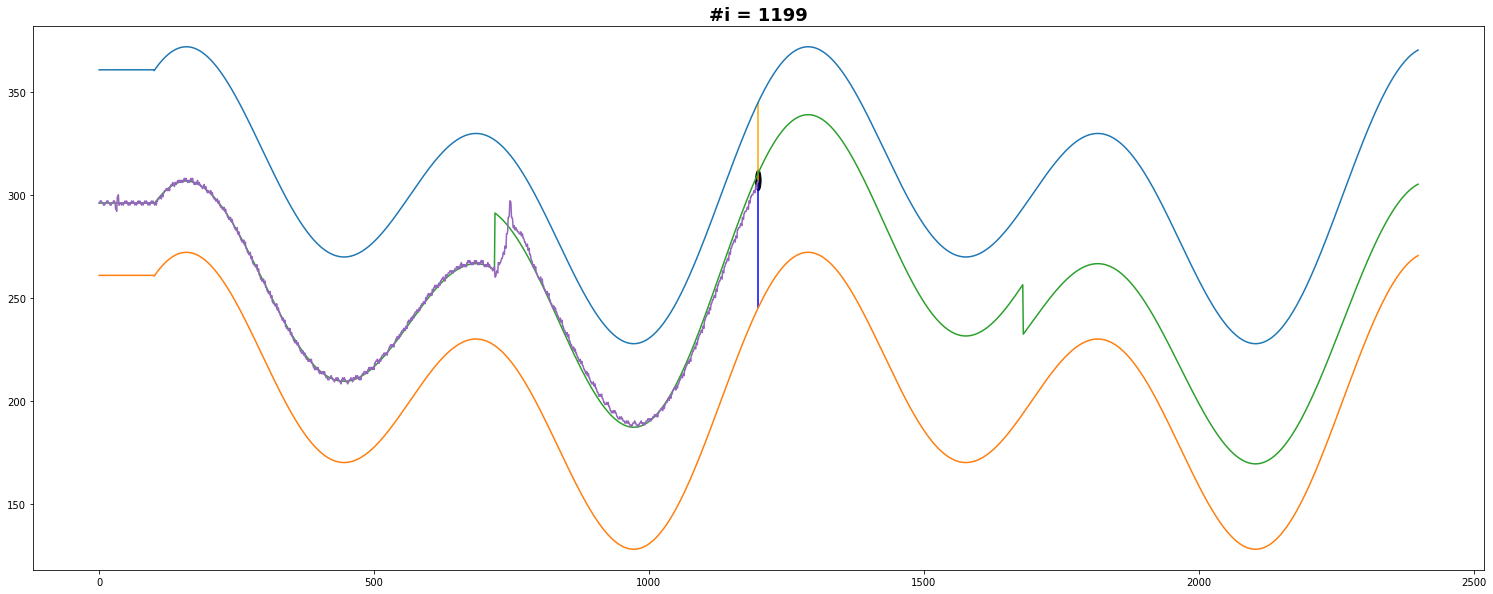

In [76]:
auto.plot_history(1)

self.distance_right_from_wall =  -62.841563828196655
self.distance_left_from_wall  =  -37.15843617180337


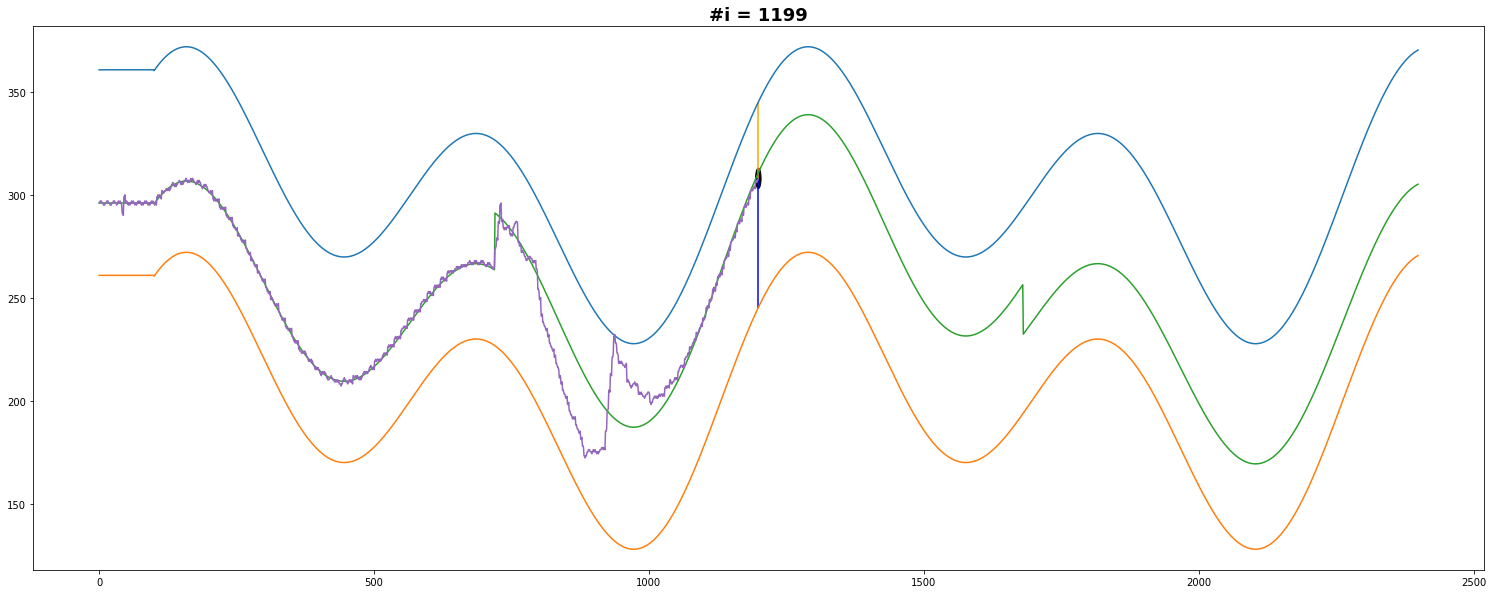

In [72]:
auto.plot_history(1)

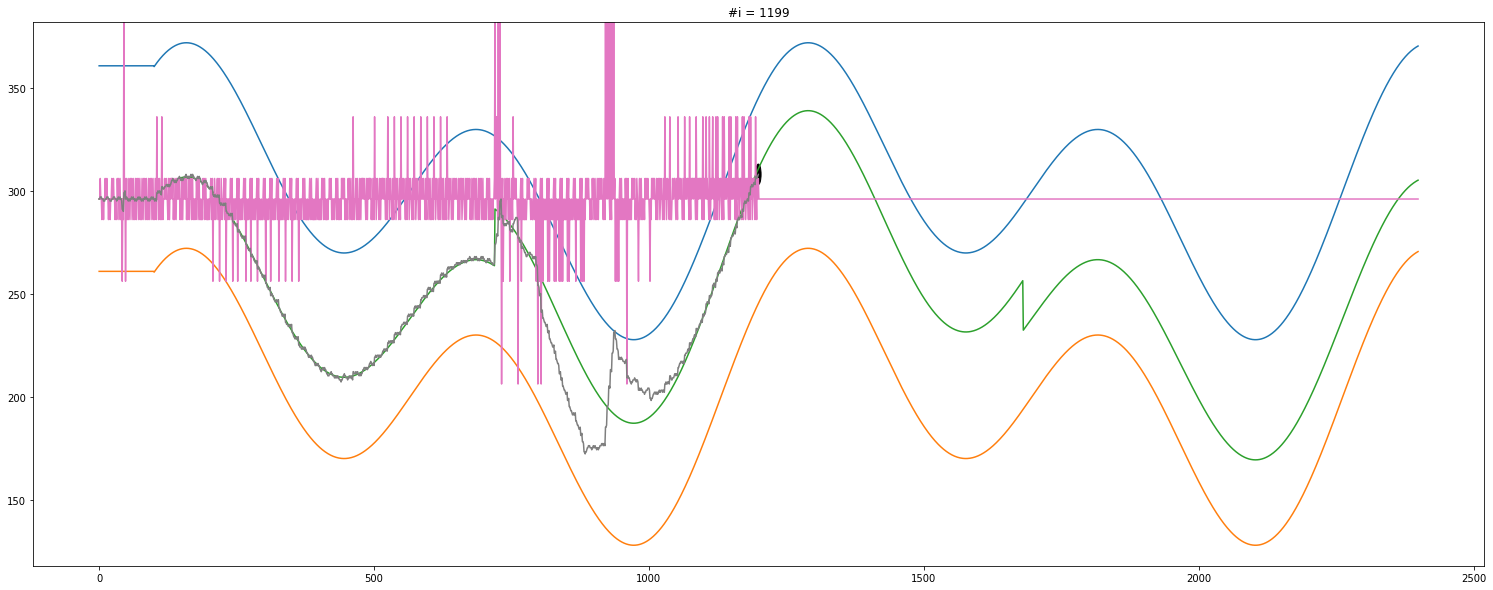

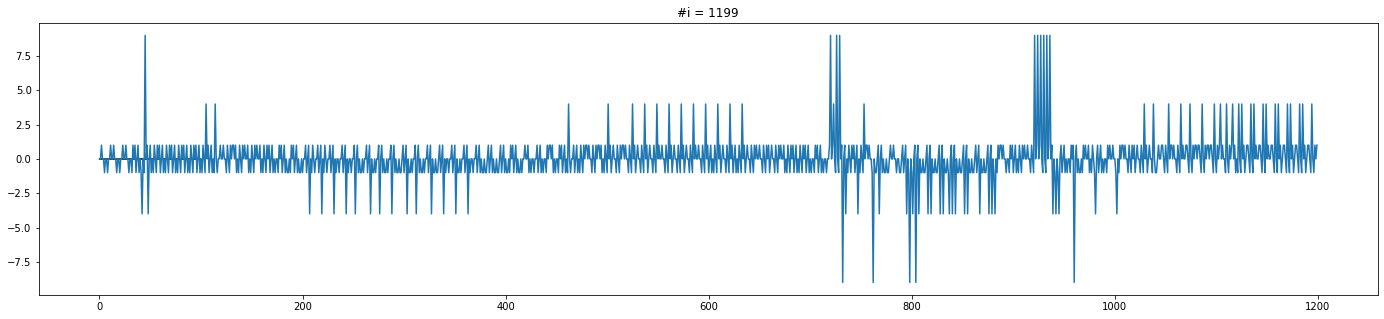

In [67]:
auto.plot_trace(freq = 1, flag = 1)

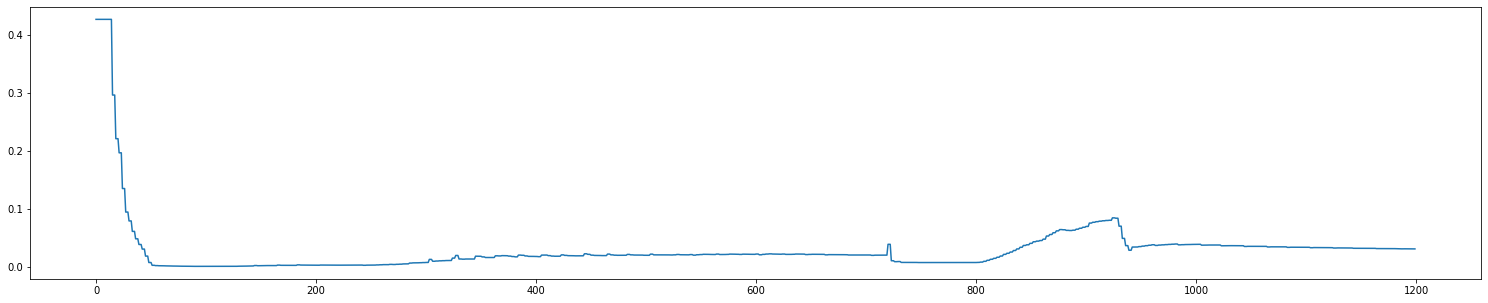

1188


In [68]:
add = [auto.loss_holder[0]] * 12

loss_history = [*add, *auto.loss_holder]

plt.figure(figsize=(26,5)); plt.plot(loss_history);  plt.show()

# mivel a neurális háló csak a 12-ik lépésben kezd el tanulni ott keletkezik elöször loss ezrért ha szinkronba
# akrom hozni a két plottot akkor 12 elemet a lista elejéhez kell adni.

print(len(auto.mlp.loss_curve_)*3)

In [75]:
# A különbség a felső és az alsó között ott van, hogy az mlp.loss_curve_ minden iteráció után letárolja a loss-t

# Amit viszont alul csinálok, az az, hogy ha megvolt a neurális hálónak adott ciklusban az összes iteráció (ez lehet 1,
# 2, 10, 100, akárhány) akkor letárolom a loss-t szintén az mlp.loss_ értékből.

# Egyébként mindkettő egy kicsit veszélyes praxis mert egyikről sem tudom, hogy pontosan milyen loss_t tárol le?
# Az iteráció végén? Vagy az utolsó batch_re? egy adott batchre_?

# Át kéne írni az egész programot úgy, hogy tényleg online módon tanítsa ami azt jelenti, hogy a fit helyett a
# partial_fit függvényt kéne használnom, és gondoskodnom kéne róla, hogy csak az új adatot kapja meg.
# Habár egyébként semmi gondom azzal, hogy nem így tanítjuk és látja a régi adatokat is és azokon végig iterálva újra
# tanul.
# Csak fontos érteni a különbséget.

# -

# Nagyon megtévesztő az MLP Loss, nem tudom pontosan mi alapján számolja ki a loss-t egy adott lépésre.
# Csak az aktuális batch-re, csak az aktuális iterációra? A teljes adaton iterál? Biztos nem az új adatok alapján.
# Szar az egész, igazából fogalmam sincs hogy milyen adatokat vesz ki ez a kurva scikit learn amikor egy iterációban
# tanul.
# Egyáltalán az egy iteráció nála azt jelenti, hogy végig kavirnyol az összes adaton amit odaadok neki és batchenként végig
# megy rajta?
# Valószínűleg így működik.
# Ha így van akkor az azt jelenti, hogy egyre hosszabb az adatsorom, egyre tovább tart egy iteráció.
# De kurvára nem ilyen online formában tanítjuk, hanem ha jól értem akkor végig megy az egész adaton amit odaadok neki,
# és minden batch esetén módosít azokon a kurva súlyokon.

# Save Real vs Predicted Plots

In [22]:
auto.save_plots()

(1203, 1)
(1203, 1)
 --- plots have been saved --- 


# Test Runs

In [52]:
exp_holder = []

first_variable  = [True,False]
second_variable = ['old', 'new']

from copy import deepcopy

# Concept drift :)
road = Road(wide = 100, length = 2400, type = 79, v = 50, shift = 0, strech = 0, noise=0, b=0, cdr = 0.2)
# cdr = concept drift rate point ( az út teljes hanyad részénél legyen a concept drift)

# Concept drift 2 darab és szimietrikus :)
road = Road(wide = 100, length = 2400, type = 78, v = 50, shift = 0, strech = 0, noise=0, b=0, cdr = 0.2)
# cdr = concept drift rate point ( az út teljes hanyad részénél legyen a concept drift)

for first_var in first_variable:
    for second_var in second_variable:
                
        plotter = Plotter()
        storage = Storage()
        printer = Printer(); printer._ut = False; printer._dc = False; printer._in = False

        auto = Car(road, plotter, storage, printer)       # <------------ megcsinálom az új autot

        auto.calculate_distances()

        auto.mlp.hidden_layer_sizes = (10, 8)     # <-- (10, 5)
        auto.mlp.early_stopping = False
        auto.mlp.validation_fraction = 0.0
        auto.mlp.batch_size = 20
        auto.mlp.shuffle = False
        auto.mlp.max_iter = 1
        auto.mlp.solver = 'sgd'

        auto.sensor_center_enable             = False
        auto.action_zero_is_allowed           = first_var         # False
        auto.linear_regression_calculation    = second_var        # Melyik linreg számítási módot használja 'old' 'new'
        
        auto.run(2396, silent = True)

        # auto.plot_history(1)
        
        exp_holder.append(deepcopy(auto))

        # Az auto tárolja az adatokat -> öket tegyük futás után egy listába

        # A PostPlotter-ben megnézem, hogy írtam meg a PlotHistory függvényt -> most egy ábrán akarom látni az összeset

        # Mivel az auto tárolja a modeljét is ezért elég az autot eltárolni, majd onnan olvasom ki a modell információit

Iteration 794, loss = 0.04416530
Iteration 795, loss = 0.04432871


MLPRegressor(activation='tanh', batch_size=20, hidden_layer_sizes=(10, 8),
             learning_rate_init=0.01, max_iter=1, n_iter_no_change=98765000,
             random_state=1, shuffle=False, solver='sgd',
             validation_fraction=0.0, verbose=True, warm_start=True)


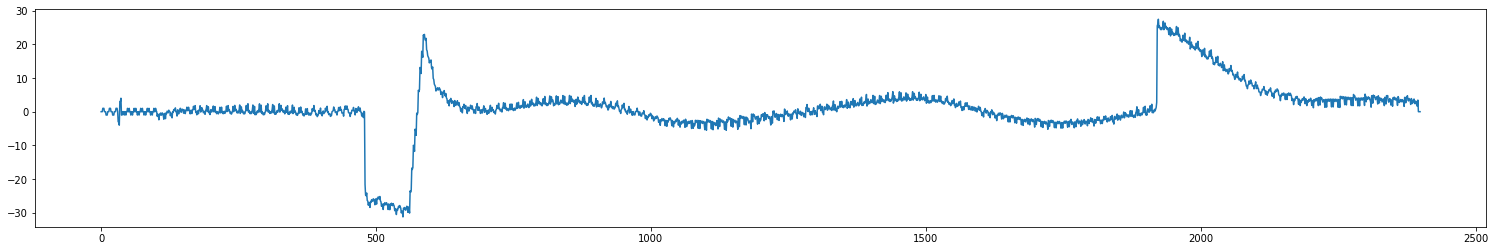

In [53]:
# Milyen plottokon kéne ábrázolni az eredményeket?

print(exp_holder[0].mlp)                              # <-- az első kísérlet mlp objektuma

# Ami még hasznos lehet
# auto.plotter.plot_mlp(mlp=auto.mlp, flag = 3)
# auto.plotter.test_plot2(auto.sensor_left, auto.sensor_right, auto.y_distance, auto.x, flag=1, lists=[6])
# auto.plotter.test_plot(auto.sensor_left, auto.sensor_right, auto.y_distance, auto.x, flag=1, lists=[99])

# Ez különösen fontos mert jól mutatja, hogy mennyire determinisztikus a kapcsolat a két szenzorra
# auto.plot_state_space_discover(1)

# Néhány meg van a PostPlotter osztályban is
postPlotter = PostPlotter(auto)
# postPlotter.plot_history(flag = 1)                    # <-- ez alapján dolgozunk
# postPlotter.plot_history_self()                       # <-- ez alapján dolgozunk
postPlotter.plot_y_distance_fix()                     # <-- ez alapján dolgozunk
# postPlotter.plot_y_distance()
# postPlotter.plot_mlp()
# postPlotter.plot_mlp_surface_prediction_v4(resolution=100, transparency=0.8, cmap='Blues', center=0.0)
# postPlotter.plot_sensors_distibution(bins=20)



# > az melyik amely nem a középvonaltól vett távolságot mondja meg, hanem hogy miket lépkedett fel-le?

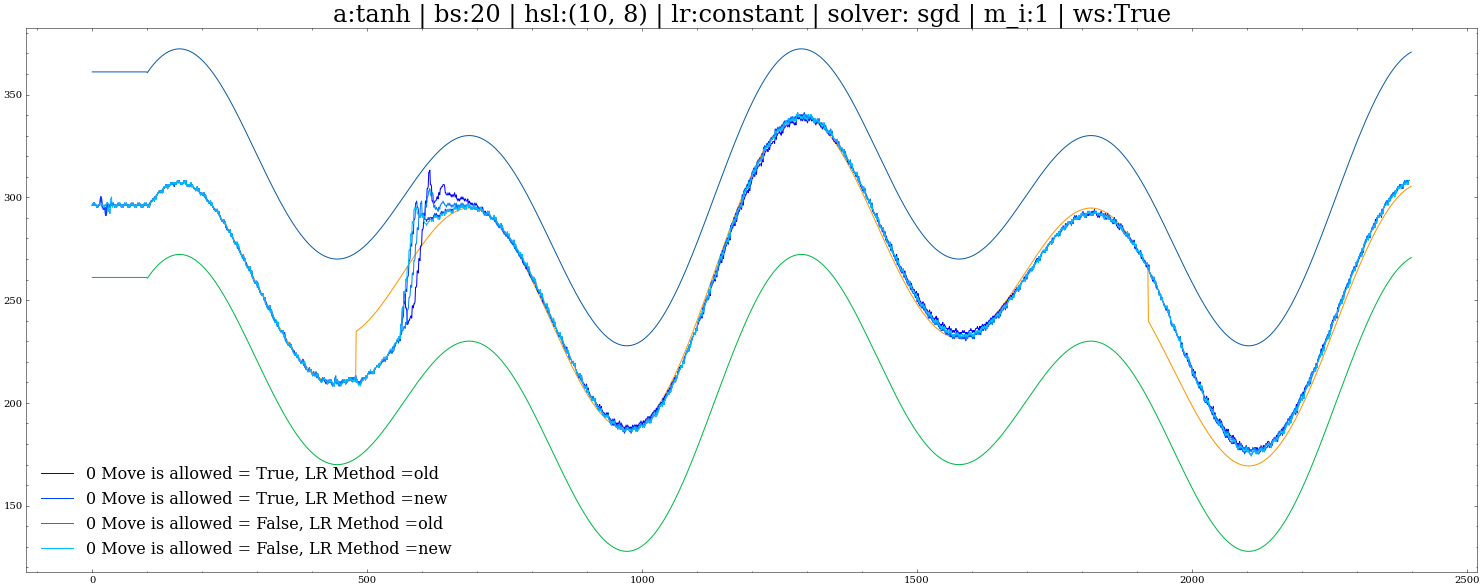

In [59]:
# https://github.com/garrettj403/SciencePlots
# https://github.com/garrettj403/SciencePlots/wiki/Gallery

# plt.style.use(['science','no-latex'])

# plt.style.use(['science','ieee', 'no-latex'])

# In this case, the ieee style will override some of the parameters from the science style in order to configure
# the plot for IEEE papers (column width, fontsizes, etc.).

# To use any of the styles temporarily, you can use:

plt.style.reload_library()

n = len(exp_holder)
start = 0
end   = 2400
ax.set_xlim((0, end + 20))                                        # <-- adjust the x_lim
# ax.set_ylim((700, 1000))                                        # <-- adjust the y_lim

with plt.style.context(['science','no-latex']):
    fig, ax = auto.road.show()

    for i, car in enumerate(exp_holder):

        action_zero_is_allowed = car.action_zero_is_allowed
        linear_regression_calculation = car.linear_regression_calculation

        var1 = action_zero_is_allowed
        var2 = linear_regression_calculation

        model_params = car.mlp.get_params()
        activation = model_params.get('activation')
        batch_size = model_params.get('batch_size')
        hls        = model_params.get('hidden_layer_sizes')
        lr         = model_params.get('learning_rate')
        solver     = model_params.get('solver')
        max_iter   = model_params.get('max_iter')
        warm       = model_params.get('warm_start')
        title = 'a:' + activation + ' | bs:' + str(batch_size) + ' | hsl:' + str(hls) +\
        ' | lr:' + str(lr) + ' | solver: ' + solver + ' | m_i:' + str(max_iter) + ' | ws:' + str(warm)
        ax.set_title(title, fontsize=24, fontweight='normal')

        # ax.plot(car.y_history[start:end], c = (0, i/n, 1, 1), lw = 1, label = '$' + str(var1) + ', ' + str(var2) + '$')
        ax.plot(car.y_history[start:end],
                c = (0, i/n, 1, 1), lw = 1,
                label = '0 Move is allowed = ' + str(var1) + ', LR Method =' + str(var2))
        

    plt.legend(frameon=False, prop={'size': 16})
    plt.show()


In [66]:
import plotly.graph_objects as go

# Create traces
fig = go.Figure()

# Néhány adat, hogy szabályozzuk a kívánt adatok hosszát
n = len(exp_holder)
start = 0
end   = 2400

# Hozzá kéne adni még az utat
x_time = np.arange(0, len(car.y_history[start:end]))

road_line = dict(color='#000000', width=1)
fig.add_trace(go.Scatter(x=x_time, y=car.road.wall_left, mode='lines', name='', line=road_line, showlegend = False))
fig.add_trace(go.Scatter(x=x_time, y=car.road.wall_center, mode='lines', name='', line=road_line, showlegend = False))
fig.add_trace(go.Scatter(x=x_time, y=car.road.wall_right, mode='lines', name='', line=road_line, showlegend = False))

for i, car in enumerate(exp_holder):
    
    action_zero_is_allowed = car.action_zero_is_allowed
    linear_regression_calculation = car.linear_regression_calculation

    var1 = action_zero_is_allowed
    var2 = linear_regression_calculation
    
    model_params = car.mlp.get_params()
    activation = model_params.get('activation')
    batch_size = model_params.get('batch_size')
    hls        = model_params.get('hidden_layer_sizes')
    lr         = model_params.get('learning_rate')
    solver     = model_params.get('solver')
    max_iter   = model_params.get('max_iter')
    warm       = model_params.get('warm_start')
    title = 'a:' + activation + ' | bs:' + str(batch_size) + ' | hsl:' + str(hls) +\
    ' | lr:' + str(lr) + ' | solver: ' + solver + ' | m_i:' + str(max_iter) + ' | ws:' + str(warm)
    
    N_exp = len(exp_holder) - 1
    b_color = 255//(i+1)
    g_color = 255//N_exp * i
    
    x_time = np.arange(0, len(car.y_history[start:end]))
    fig.add_trace(go.Scatter(x=x_time, y=car.y_history[start:end],
                    mode='lines',
                    line=dict(
                        color='rgb(0,'+ str(g_color) + ', ' + str(b_color) + ')',
                        width=1
                    ),
                    name='' + str(var1) + ',' + str(var2) ))

fig.update_layout(
    title={
        'text': "Runs with different configurations <br> " + title,
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="Time steps",
    yaxis_title="",
    legend_title="Legend",
    font=dict(
        family="Times New Roman, monospace",
        size=14,
        color="Black"
    )
)

fig.show()

# Test Runs Folyatatás

In [ ]:
exp_holder = []

first_variable  = [True,False]
second_variable = ['old', 'new']
third_variable  = ['mikor lépkedjen--------------']

from copy import deepcopy

# Concept drift :)
road = Road(wide = 100, length = 2400, type = 79, v = 50, shift = 0, strech = 0, noise=0, b=0, cdr = 0.2)
# cdr = concept drift rate point ( az út teljes hanyad részénél legyen a concept drift)

# Concept drift 2 darab és szimietrikus :)
road = Road(wide = 100, length = 2400, type = 78, v = 50, shift = 0, strech = 0, noise=0, b=0, cdr = 0.2)
# cdr = concept drift rate point ( az út teljes hanyad részénél legyen a concept drift)

for first_var in first_variable:
    for second_var in second_variable:
                
        plotter = Plotter()
        storage = Storage()
        printer = Printer(); printer._ut = False; printer._dc = False; printer._in = False

        auto = Car(road, plotter, storage, printer)       # <------------ megcsinálom az új autot

        auto.calculate_distances()

        auto.mlp.hidden_layer_sizes = (10, 8)     # <-- (10, 5)
        auto.mlp.early_stopping = False
        auto.mlp.validation_fraction = 0.0
        auto.mlp.batch_size = 20
        auto.mlp.shuffle = False
        auto.mlp.max_iter = 1
        auto.mlp.solver = 'sgd'

        auto.sensor_center_enable             = False
        auto.action_zero_is_allowed           = first_var         # False
        auto.linear_regression_calculation    = second_var        # Melyik linreg számítási módot használja 'old' 'new'
        
        auto.run(2396, silent = True)

        # auto.plot_history(1)
        
        exp_holder.append(deepcopy(auto))

        # Az auto tárolja az adatokat -> öket tegyük futás után egy listába

        # A PostPlotter-ben megnézem, hogy írtam meg a PlotHistory függvényt -> most egy ábrán akarom látni az összeset

        # Mivel az auto tárolja a modeljét is ezért elég az autot eltárolni, majd onnan olvasom ki a modell információit

# Dev

<a name="dev"></a> [set](#set) [exp](#exp) [run](#run) dev [pst](#pst) [str](#str) [zip](#zip) [mp4](#mp4) [tst](#tst)


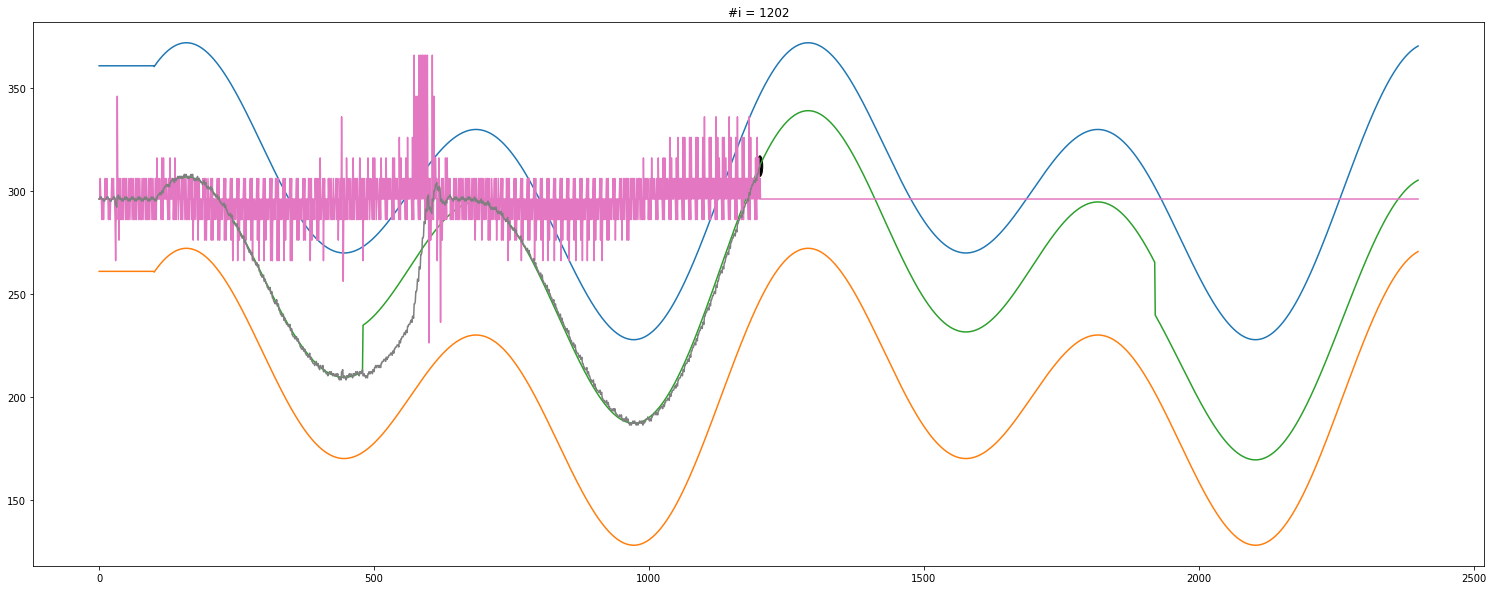

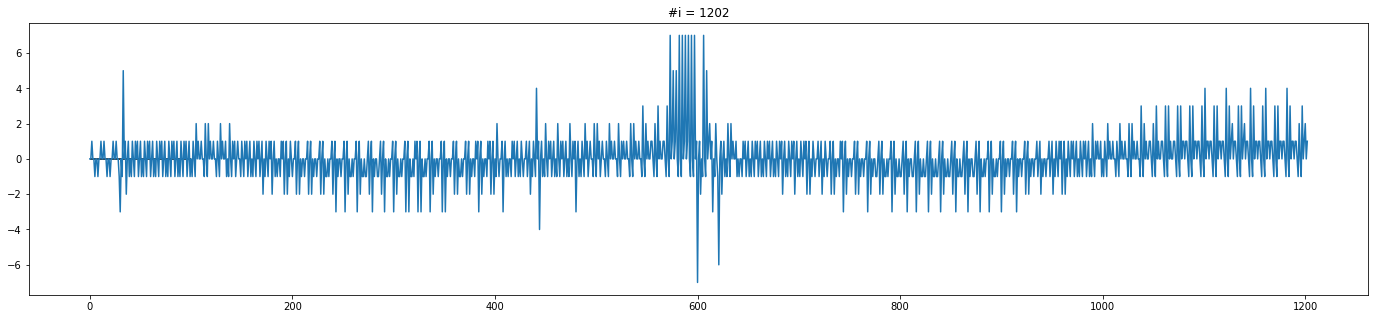

In [37]:
auto.plot_trace(1, 1)

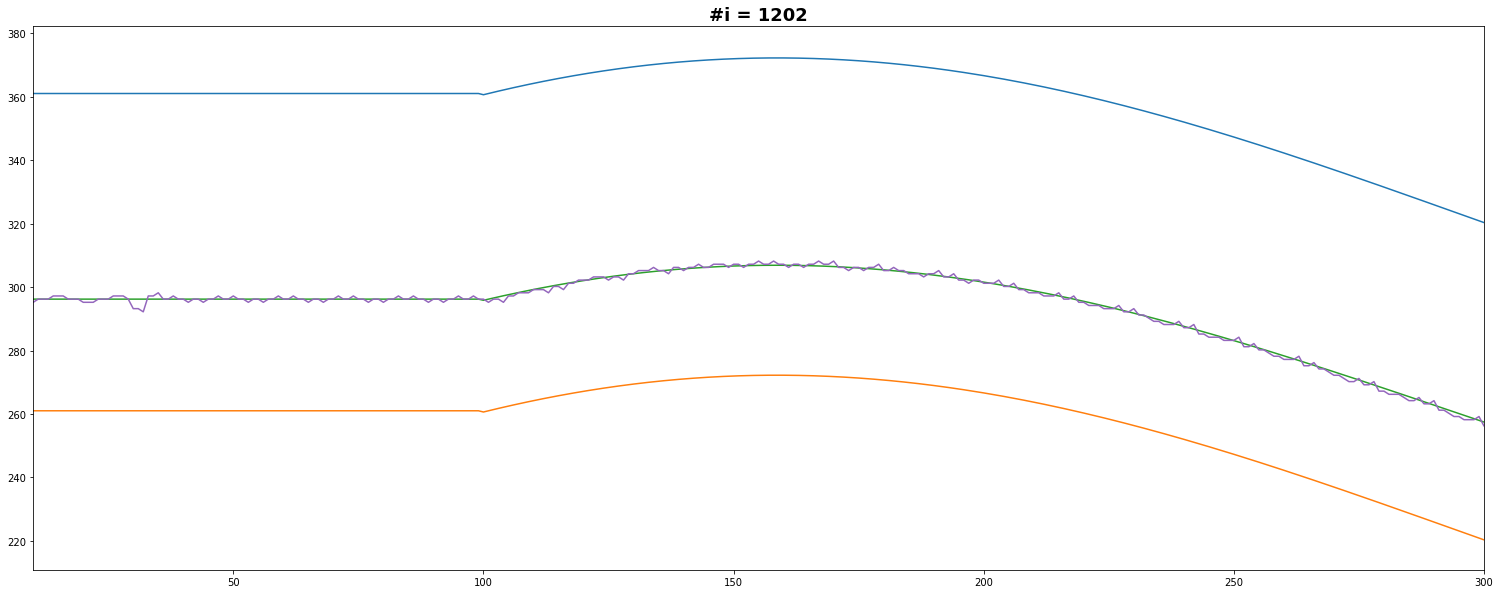

In [38]:
auto.plot_history_range(1, 10, 300, autoscale=True)

In [27]:
print('len = ', len(auto.mlp.coefs_))

print('type(auto.mlp.coef_[0]) = ', type(auto.mlp.coefs_[0]))
print('type(auto.mlp.coef_[1]) = ', type(auto.mlp.coefs_[1]))

print('auto.mlp.coef[].shape = ',auto.mlp.coefs_[0].shape)
print('auto.mlp.coef[].shape = ',auto.mlp.coefs_[1].shape)
print('auto.mlp.coef[].shape = ',auto.mlp.coefs_[2].shape)

len =  3
type(auto.mlp.coef_[0]) =  <class 'numpy.ndarray'>
type(auto.mlp.coef_[1]) =  <class 'numpy.ndarray'>
auto.mlp.coef[].shape =  (3, 10)
auto.mlp.coef[].shape =  (10, 8)
auto.mlp.coef[].shape =  (8, 1)


1173


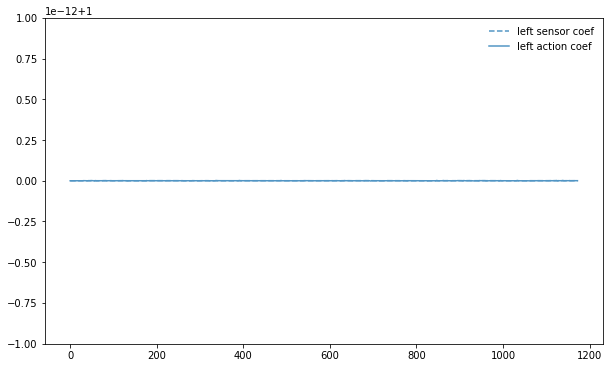

1173


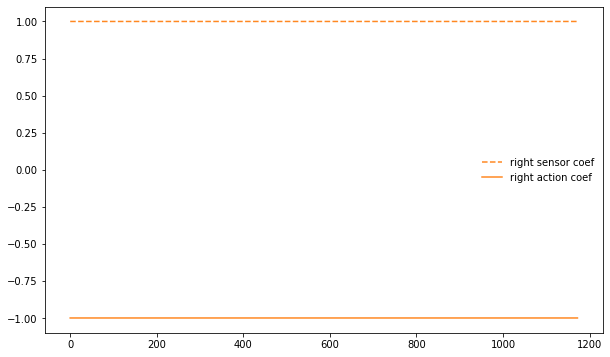

1173


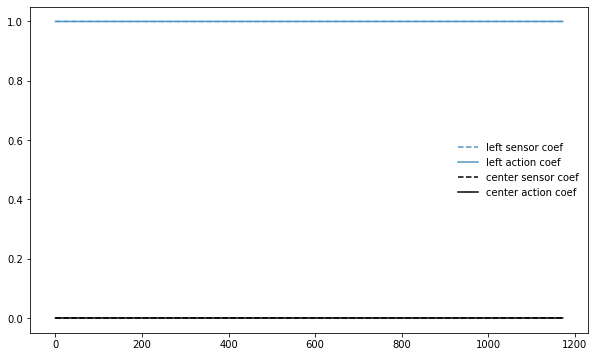

1173


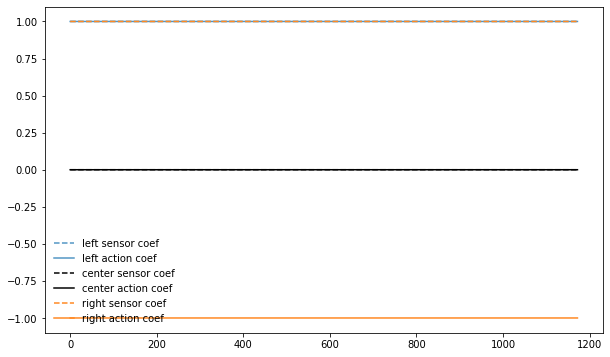

1173


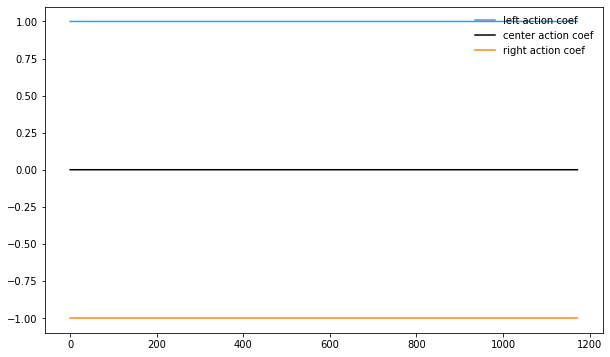

1173


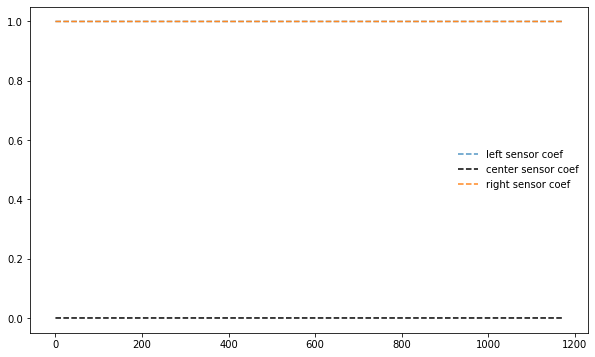

In [39]:

# ugyen ezt meg kell csinálni az mlp modellre is (ott kicsit több súly van)

# aztán áttenni mindkettőt a plotter osztályba


postPlotter = PostPlotter(auto)

postPlotter.plot_lr_weight(car = auto, flag = 1)

postPlotter.plot_lr_weight(car = auto, sensors=['right'], flag = 1)

postPlotter.plot_lr_weight(car = auto, sensors=['left', 'center'], flag = 1)

postPlotter.plot_lr_weight(car = auto, sensors=['left', 'center', 'right'], flag = 1)

postPlotter.plot_lr_weight(car = auto, sensors=['left', 'center', 'right'], coefs=['sensor'], flag = 1)

postPlotter.plot_lr_weight(car = auto, sensors=['left', 'center', 'right'], coefs=['action'], flag = 1)


In [29]:
# Create rotated animation from still image - sensor_left, sensor_right vs y_distance

# Temporary disabled - flag = 0

from dev import *

for i in range(100):
    Plot3DVersion5(elevation = 10, azimuth = i, flag = 0, i=i)

[ 3 10  8  1]


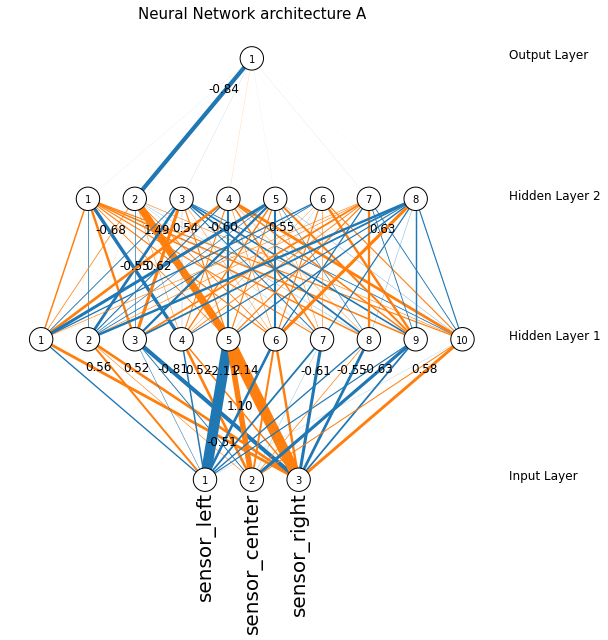

In [30]:
auto.plotter.plot_mlp(mlp=auto.mlp, flag = 3)

In [31]:
# Hogy a faszba tanította rá magát a centerre amikor annak az értéke végig 0

# auto.sensor_center
# auto.sensor_center
# auto.sensor_left

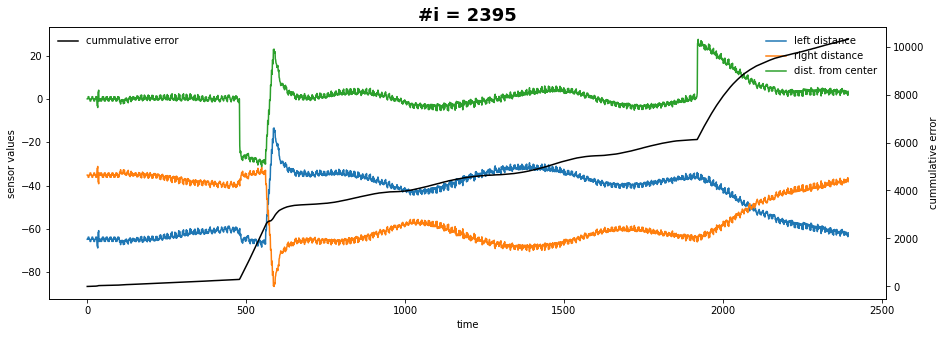

In [32]:
auto.plotter.test_plot2(auto.sensor_left, auto.sensor_right, auto.y_distance, auto.x, flag=1, lists=[6])

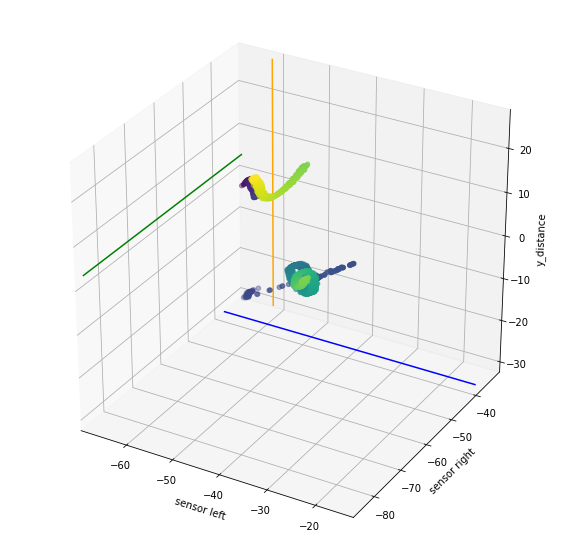

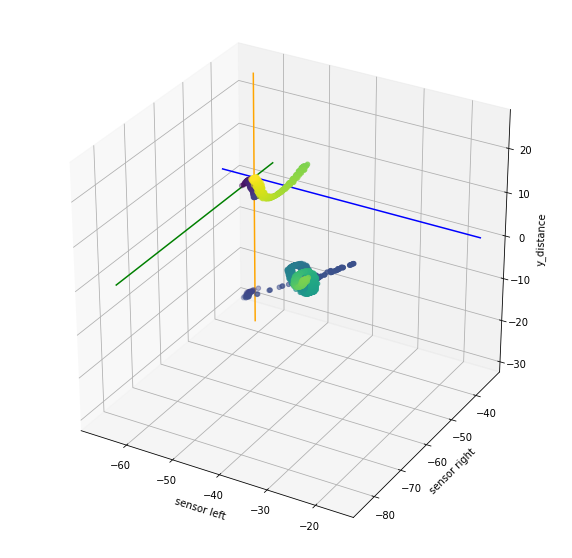

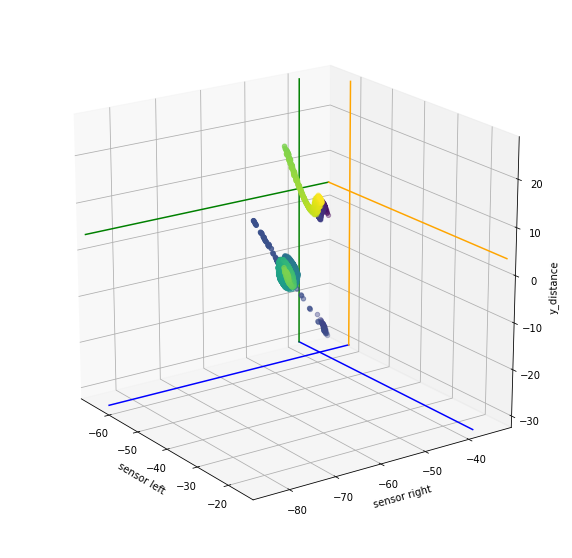

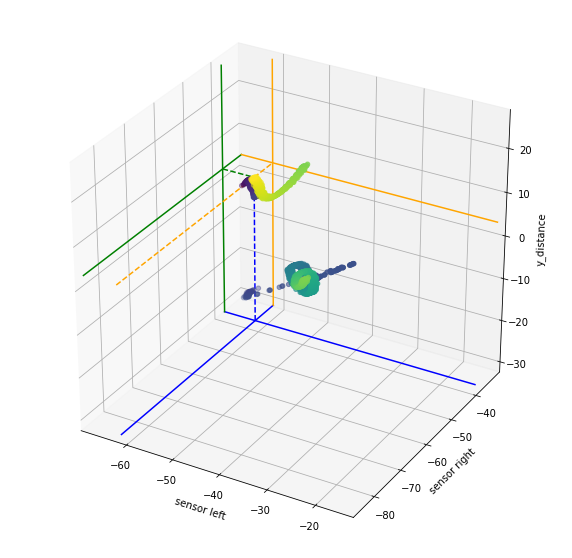

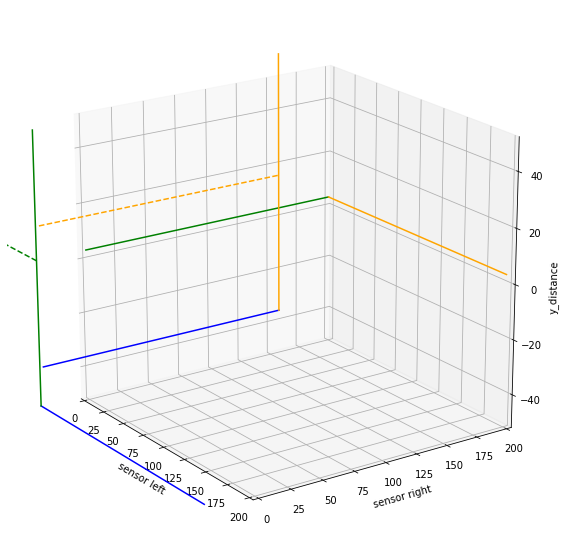

In [33]:
auto.plotter.test_plot(auto.sensor_left, auto.sensor_right, auto.y_distance, auto.x, flag=1, lists=[99])

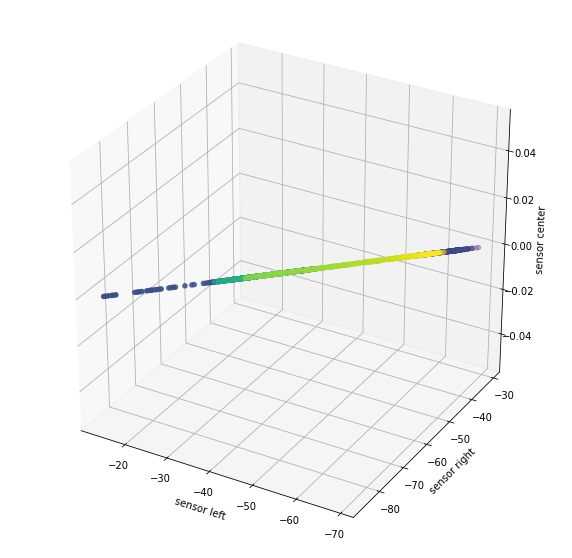

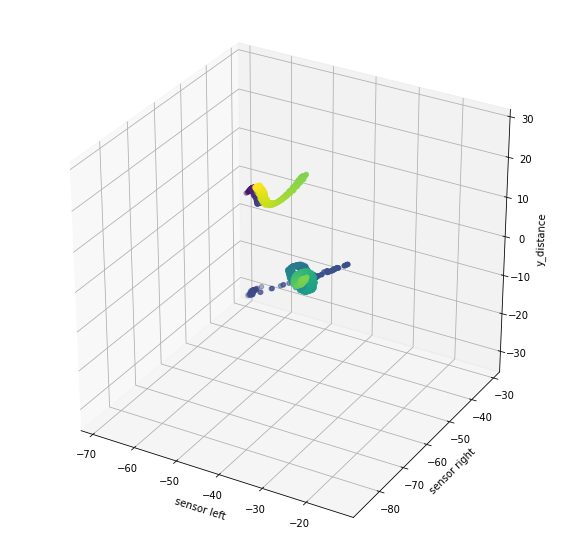

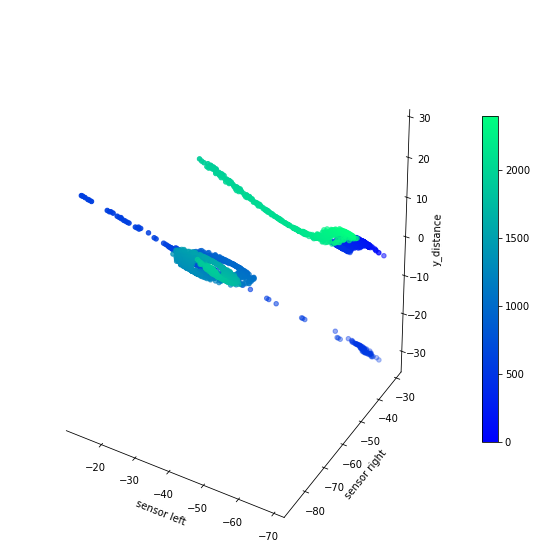

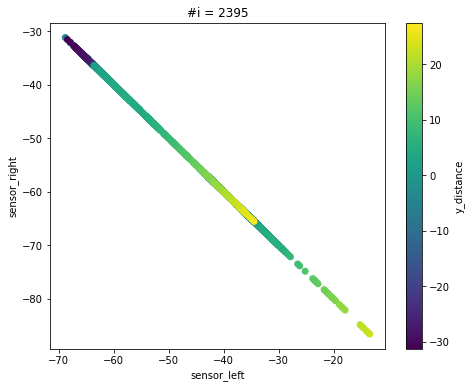

In [34]:
auto.plot_state_space_discover(1)

# PostPlotter

<a name="pst"></a> [set](#set) [exp](#exp) [run](#run) [dev](#dev) pst [str](#str) [zip](#zip) [mp4](#mp4) [tst](#tst)


self.distance_right_from_wall =  -38.20963855785379
self.distance_left_from_wall  =  -61.79036144214621


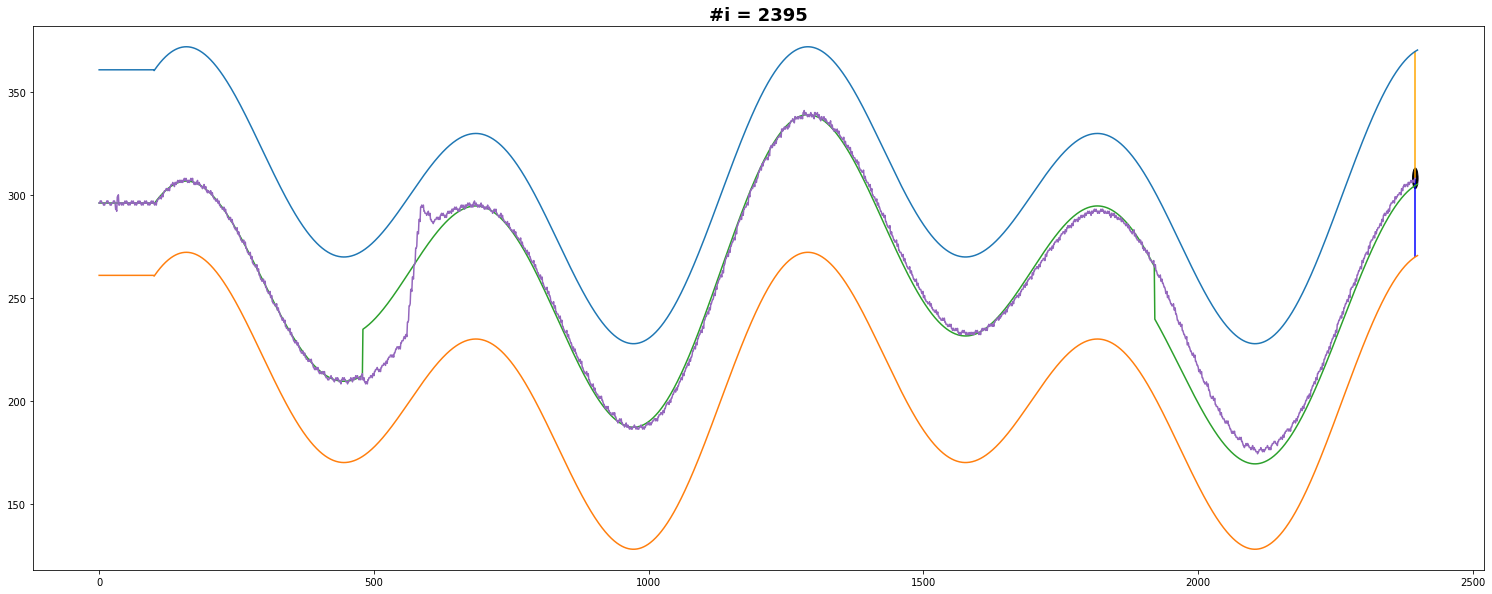

In [35]:
# Nem post plotter, hanem az auto.plot_history(flag = 1)
auto.plot_history(1)

self.distance_right_from_wall =  -38.20963855785379
self.distance_left_from_wall  =  -61.79036144214621


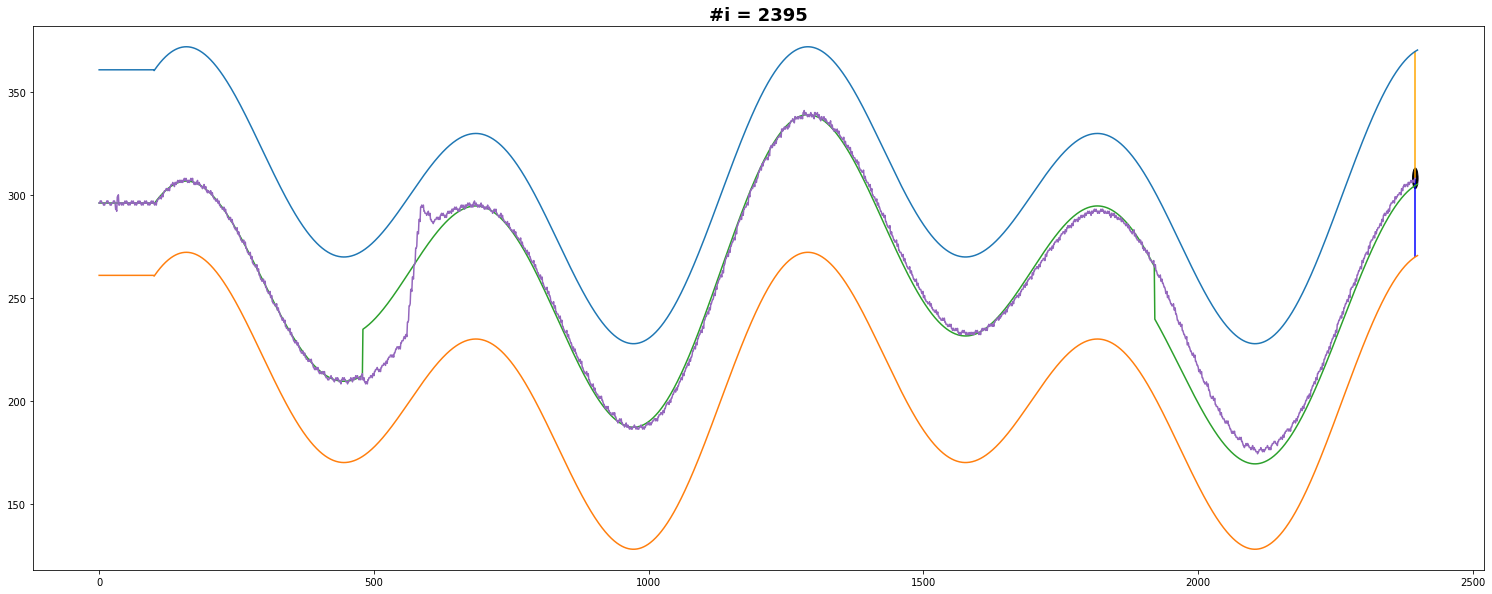

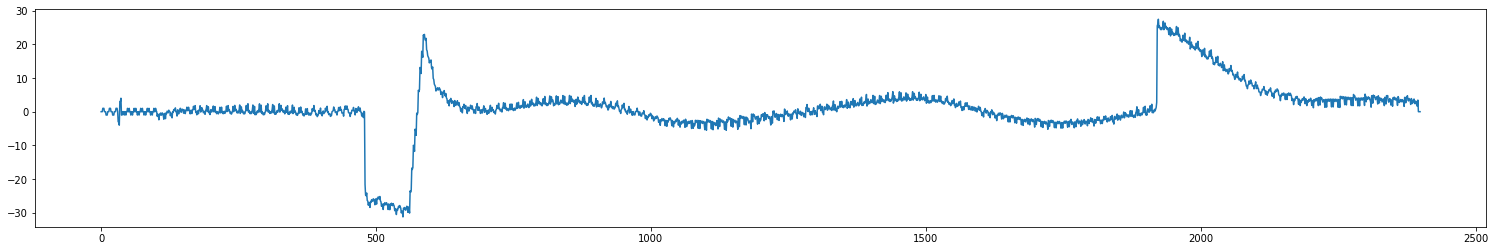

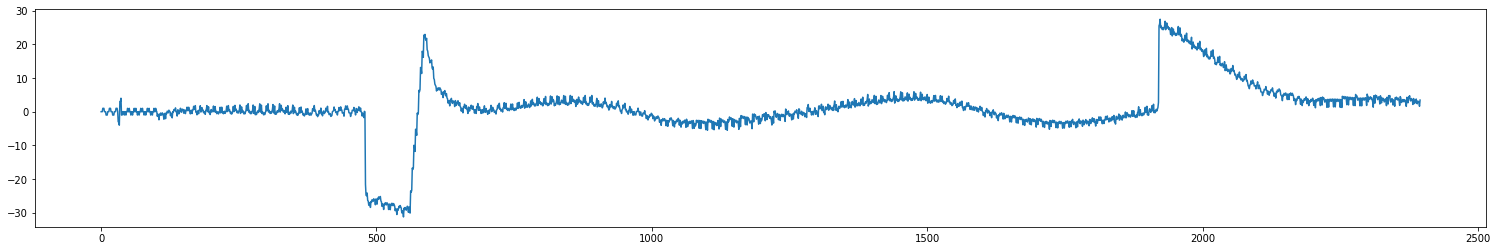

[ 3 10  8  1]


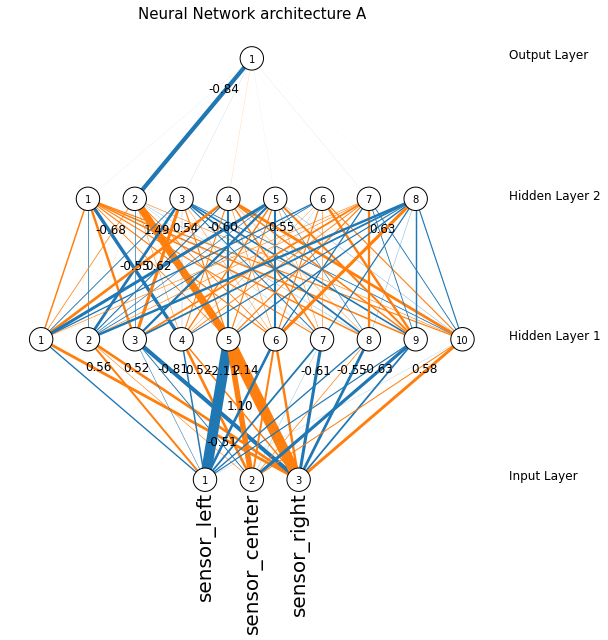

In [36]:
postPlotter = PostPlotter(auto)

postPlotter.plot_history(flag = 1)

postPlotter.plot_y_distance_fix()

postPlotter.plot_y_distance()

postPlotter.plot_mlp()


In [37]:
# csinálni egy animációt simán arra, hogy fix center érték mellett megtekeri a plotot

# csinálni arra is egy animációt, hogy fix nézőpont mellett végig iterál center 50-től 200-ig

# Create rotated animation from still image - sensor_left, sensor_right vs y_distance, predcition

# Temporary disabled - flag = 0

for i in range(100):
    postPlotter.plot_mlp_surface_prediction_v4(limit = True, flag = 0, resolution=100, transparency=0.8, cmap='Blues',
                                               center=100, elevation=10, azimuth = i, i = i)

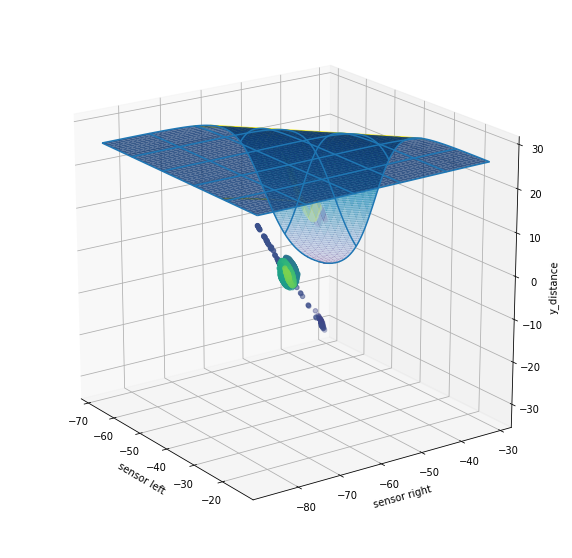

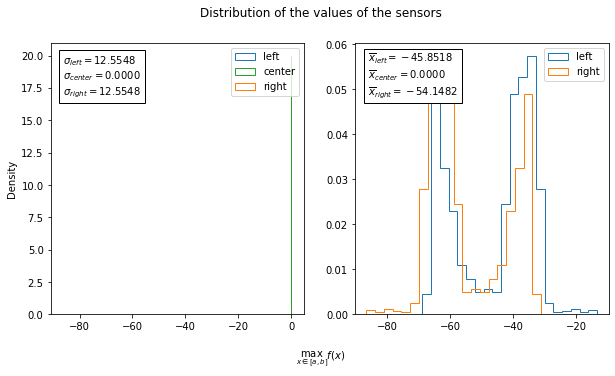

In [38]:
# https://matplotlib.org/stable/tutorials/colors/colormaps.html

postPlotter = PostPlotter(auto)

postPlotter.plot_mlp_surface_prediction_v4(resolution=100, transparency=0.8, cmap='Blues', center=0.0)

postPlotter.plot_sensors_distibution(bins=20)

## TestCar

<a name="str"></a> [set](#set) [exp](#exp) [run](#run) [dev](#dev) [pst](#pst) str [zip](#zip) [mp4](#mp4) [tst](#tst)


In [39]:
# Save

# Via storage object -> passing a car object
storage.save_mlp_from_object(auto)
storage.save_regression_from_object(auto)
storage.save_minmaxscaler_from_object(auto)

# Via auto.storage object -> passing a car object and its property fields
#  -> this can be used inside the car.run() methos as well
auto.storage.save_mlp(auto.mlp)
auto.storage.save_minmaxscaler(auto.x_minmaxscaler, auto.y_minmaxscaler)
auto.storage.save_regression(auto.regression_left, auto.regression_center, auto.regression_right)

# Both, the storage and the auto.storage has the same refrence, so it works back and forth

# ----------------------------------------------------------------------------------------

# Load

# Via storage object -> these are void methods but updates its own self.property fields which later can be called such 'storage.mlp', 'storage.regression_left'
storage.load_mlp()
storage.load_regression()
storage.load_minmaxscaler()


# Via car object -> these are the same as above (as storage is a property of the car object) -> works as a static void or a vodi setter
auto.storage.load_mlp()
auto.storage.load_regression()
auto.storage.load_minmaxscaler()
# Both, the storage and the auto.storage has the same refrence, so it works back and forth


# Ez viszont csak az auto objektumon kereszül érhető el és nem perzistens, gyakorlatilag ezt mentjük el és ezt váltjuk ki a betöltéssel, ha van mit betölteni
auto.mlp

# Ha el lett menteve akármelyik módszerrel
storage.save_mlp_from_object(auto)
auto.storage.save_mlp(auto.mlp)
# Akkor utána elérhető akár az auto.storage objektumon keresztül
auto.storage.mlp
# Akár a storage objektumon keresztül, mert minkettőnek ugyan az a referenciája
storage.mlp

# lényegében ha a storage load megtörtént akkor ezt kell használnom a tesztautóban
# a tesztautó példányosításnál kapja meg a storage-ot és az __init__-ben híja
# meg a load_all metodust

# tanuló car (auto) pedig a futás végén hívja meg a storage save_all metodust
# ezzel gyakorlatilag kiírja minden modelt amit majd a teszt autó be tud olvasni

MLPRegressor(activation='tanh', batch_size=20, hidden_layer_sizes=(10, 8),
             learning_rate_init=0.01, max_iter=1, n_iter_no_change=98765000,
             random_state=1, shuffle=False, solver='sgd',
             validation_fraction=0.0, verbose=True, warm_start=True)

In [47]:
# Igazából azt hiszem az utat sem kell újra megcsinálnunk, de ha később új utat szeretnénk neki adni azt itt tehetjük meg
# testRoad = Road(wide = 100, length = 3000)

testRoad = road


# A plotter objektumot sem kell újra példányosítanunk, helyette a régi plottert kapja meg
# plotter = Plotter()
# Nem csinálunk új storage objektumot, helyette a feltanítottat kapja meg
# storage = Storage()
# wwwww
testAuto = TestCar(testRoad, plotter, storage, printer)

# Ez az egyetlen paraméter amit nem adok át neki sehogy ezért settelni kell
testAuto.linear_regression_calculation =  'new'

# Ez egy elég szar megoldás, de ha nem akarom, hogy szétessen a korábbi verziókkal, akkor így kell csinálnom.
# Egyszer befejezem a kurva kódot akkor refaktorálom az egészet egy új Github projecten

testAuto.calculate_distances()

# testAuto.run(2650)

# A testAuto.run() megkaphatja paraméterként, hogy milyen feltétel alapján hívja meg az action-t

testAuto.sensor_center_enable = False

testAuto.printer._ta = True
testAuto.printer._ut = False

testAuto.run(1806, cond = 5)      # 2222222222222 -> 1(csak a 3 lépésben), 2(mindíg), 3(x<500), 4(felt.szenz), 5(felt.target)

---------- Finish Run ----------


self.distance_right_from_wall =  -38.510456067821735
self.distance_left_from_wall  =  -61.489543932178265


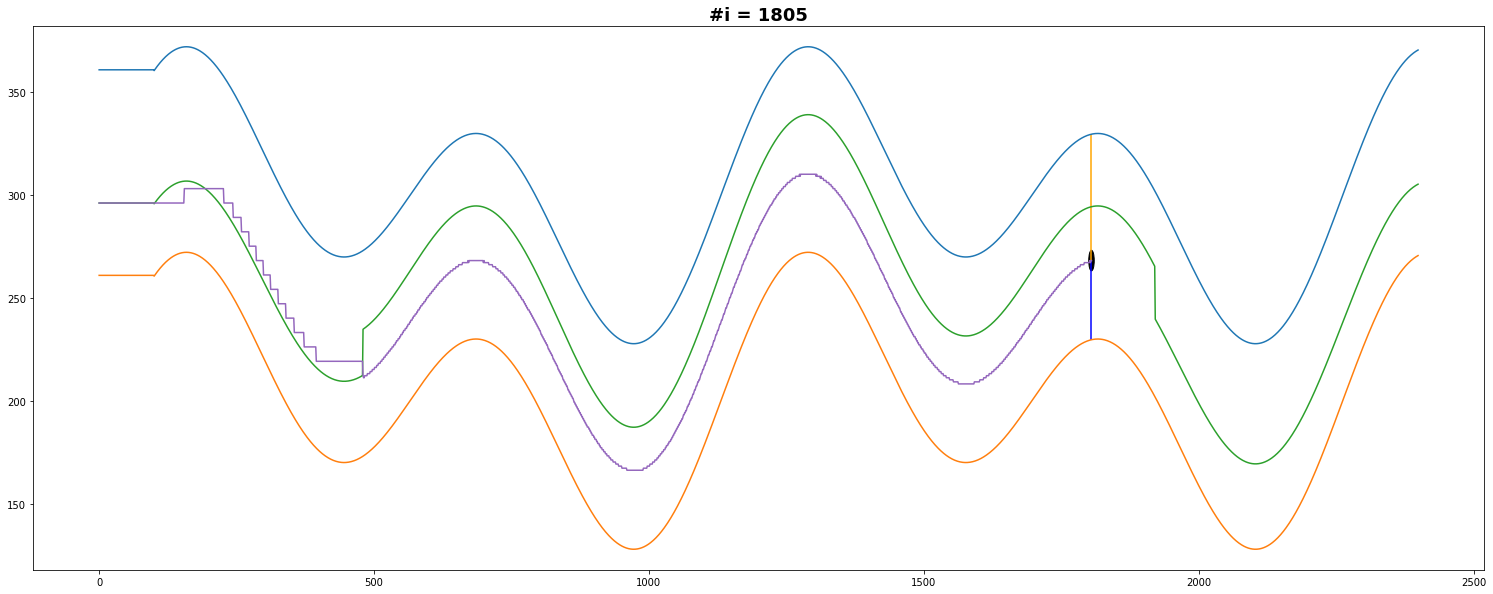

In [48]:
testAuto.plot_history(1, autoscale = True)

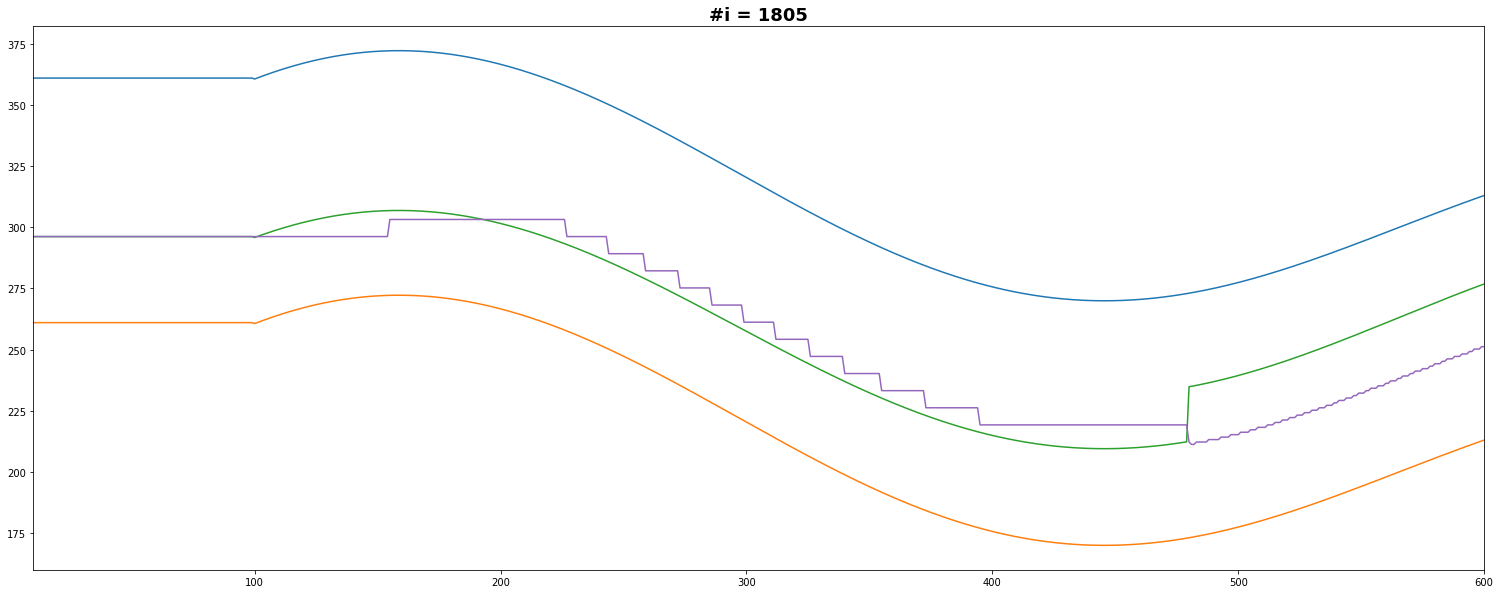

In [49]:
testAuto.plot_history_range(flag = 1, start = 10, end = 600, autoscale = True)

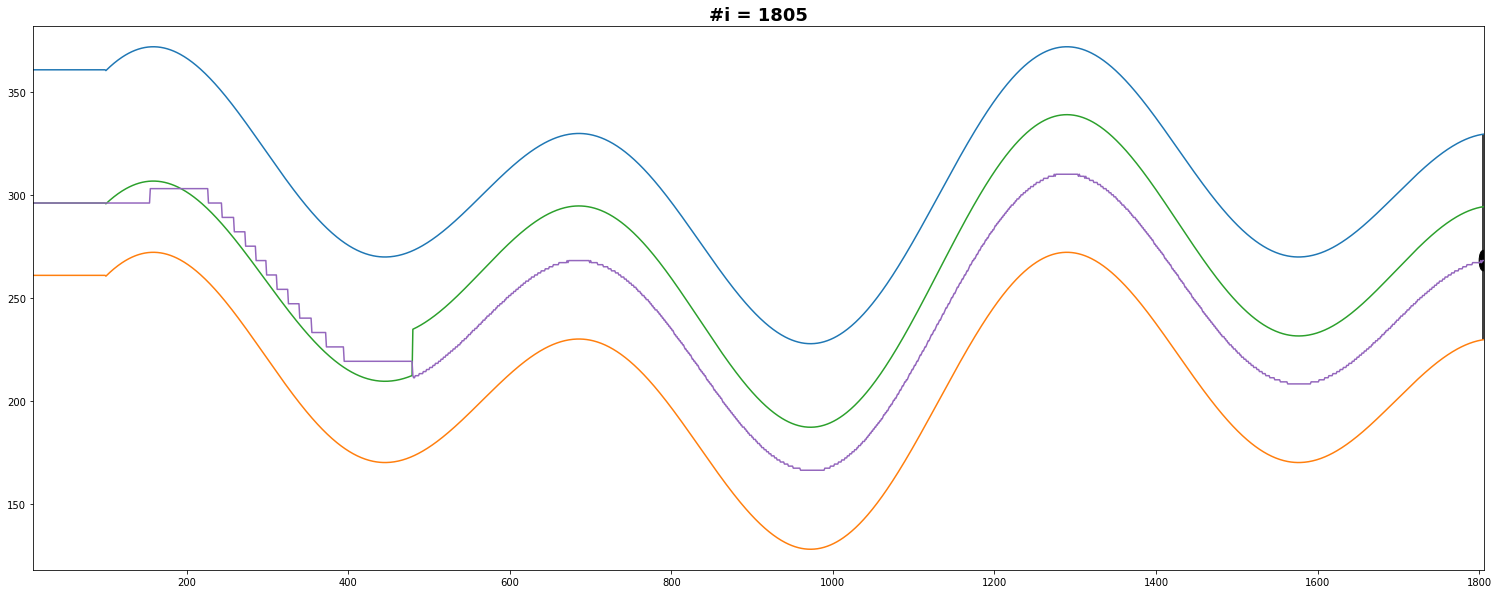

In [50]:
testAuto.plot_history_range(flag = 1, start = 10, end = 2000)

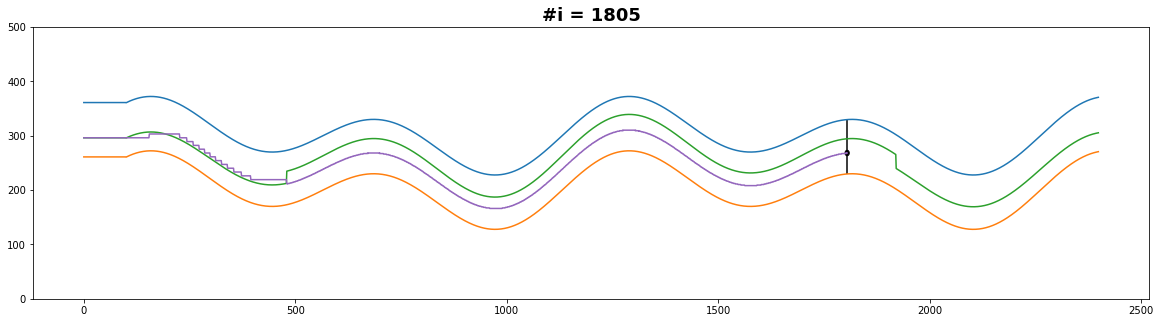

In [51]:

testAuto.plot_history_fixed(flag = 1, ymin = 0, ymax = 500, width = 20, height = 5)


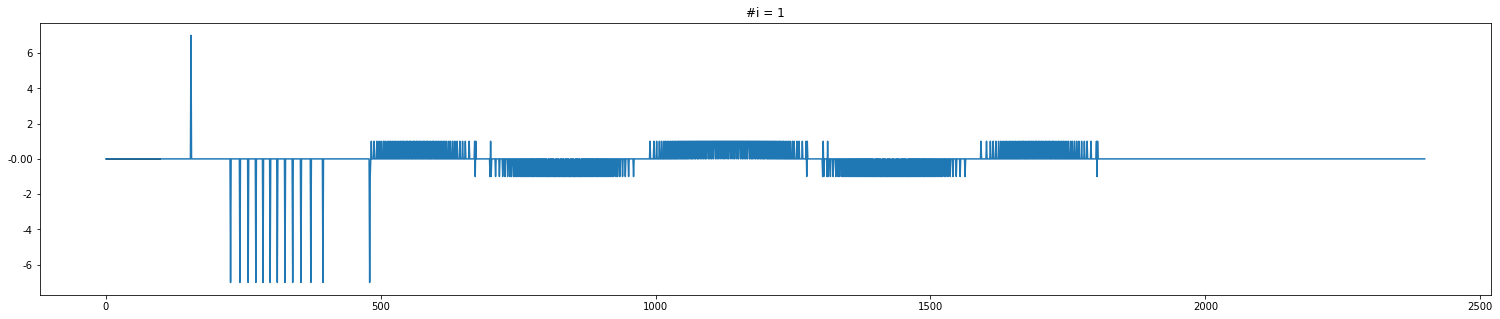

In [52]:
postPlotter = PostPlotter(testAuto)
postPlotter.plot_y_move_v2(car = testAuto, x = 1, flag = 1, height = 5)

Érdemes újra lefuttatni úg hogy a condition=1 és úgy hogy a condition=4 vagy a condition=5

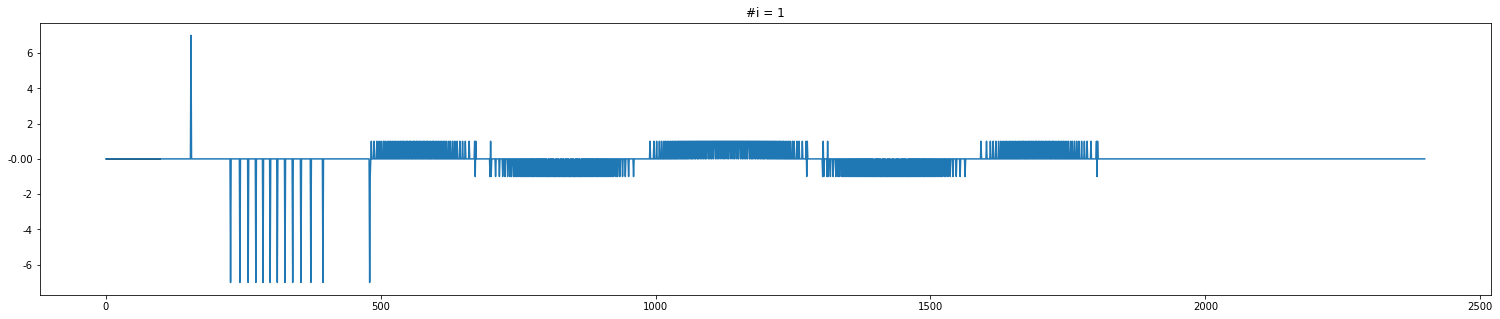

In [53]:
postPlotter = PostPlotter(testAuto)
postPlotter.plot_y_move_v2(car = testAuto, x = 1, flag = 1, height = 5)

In [54]:
# Igazából azt hiszem az utat sem kell újra megcsinálnunk, de ha később új utat szeretnénk neki adni azt itt tehetjük meg
# testRoad = Road(wide = 100, length = 3000)

testRoad = road


# A plotter objektumot sem kell újra példányosítanunk, helyette a régi plottert kapja meg
# plotter = Plotter()
# Nem csinálunk új storage objektumot, helyette a feltanítottat kapja meg
# storage = Storage()
# wwwww
testAuto = TestCar(testRoad, plotter, storage, printer)

testAuto.calculate_distances()

# testAuto.run(2650)

# A testAuto.run() megkaphatja paraméterként, hogy milyen feltétel alapján hívja meg az action-t

testAuto.sensor_center_enable = False
testAuto.linear_regression_calculation =  'new'

testAuto.printer._ta = True
testAuto.printer._ut = False

testAuto.run(1200, cond = 1)      # 2222222222222 -> 1(csak a 3 lépésben), 2(mindíg), 3(x<500), 4(felt.szenz), 5(felt.target)

------------------------------ IF i % 3 > 0 ------------------------------ 
=================== TAKE ACTION =================== 
-------- ennyivel módosítom self.y értékét -------- 
self.y régi értéke =  278.20679813169795
self.y új értéke   =  280.20679813169795
self.y_distance[-1]=  -28.469070930725138
action             =  2
----------------- módosítás vége ----------------- 
------------------------------ IF i % 3 > 0 ------------------------------ 
=================== TAKE ACTION =================== 
-------- ennyivel módosítom self.y értékét -------- 
self.y régi értéke =  280.20679813169795
self.y új értéke   =  281.20679813169795
self.y_distance[-1]=  -28.31163652350773
action             =  1
----------------- módosítás vége ----------------- 
------------------------------ IF i % 3 > 0 ------------------------------ 
=================== TAKE ACTION =================== 
-------- ennyivel módosítom self.y értékét -------- 
self.y régi értéke =  281.20679813169795
self.y új érté

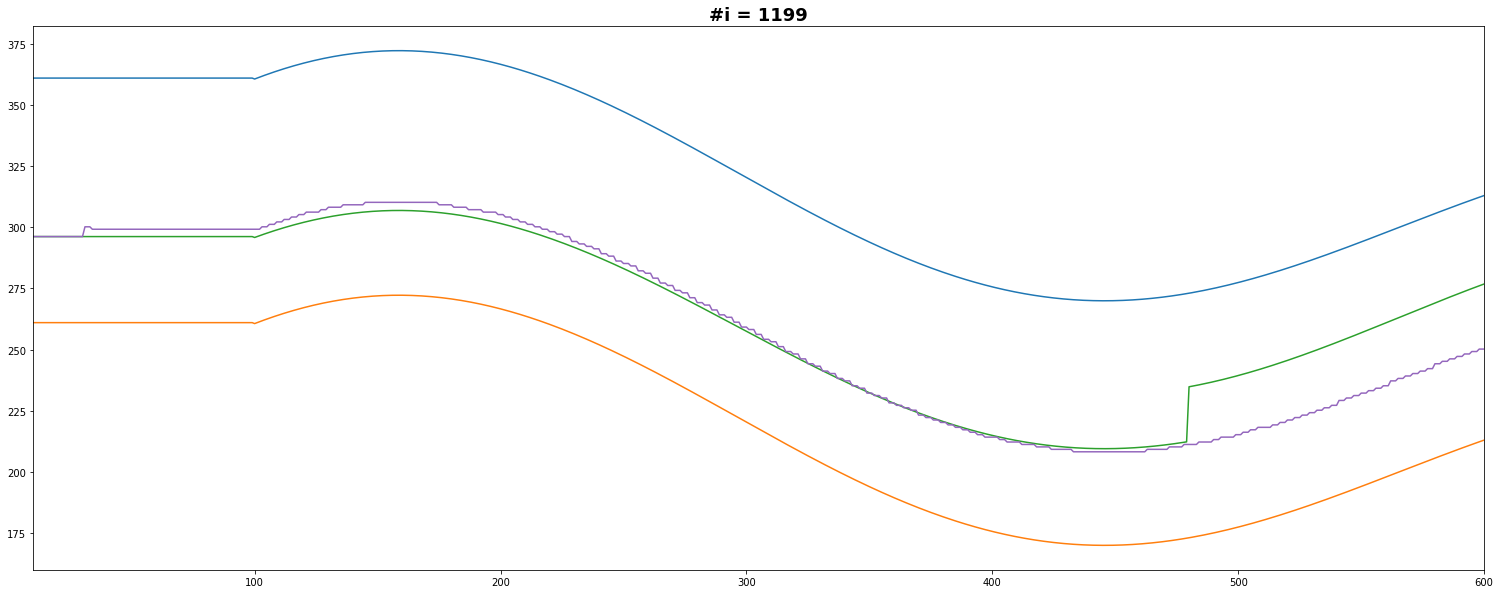

In [55]:
testAuto.plot_history_range(flag = 1, start = 10, end = 600)

# Data

In [56]:
# Egyéként ha majd azt akarom csinálni, hogy menet közben nem akarok kiprintelni semmit
# de a végén szeretnék néhány képet csinálni a meglévő függvényekkel.
# Akkor nem kell újra írnom őket, hanem a Car ojektumon átálitom a <<flag>>
# értékeket és meghívom az adott plot() függvényt valahogy így

# auto.plot_investigation_flag = 1          # 0 - disable, 1 - plot, 2 - save, 3 - both

# auto.plot_investigation_senors(_y_test_full, predicted_test_full, self.plot_investigation_flag)

# bár azért ezzel óvatósan, ki tudja mit tárolt el éppen az utolsó változó

# Zip *.png to images.zip

<a name="zip"></a> [set](#set) [exp](#exp) [run](#run) [dev](#dev) [pst](#pst) [str](#str) zip [mp4](#mp4) [tst](#tst)


In [57]:
%%capture
! zip -0 images.zip *.png

# Csak a Google Colabon használom

# from google.colab import files

# files.download('images.zip')

# Save to MP4

A gif exportot kivettem, ha kell a régebiek között X23 megtalálható.<br>
Felváltottam az MP4 Exporttal.

<a name="mp4"></a> [set](#set) [exp](#exp) [run](#run) [dev](#dev) [pst](#pst) [str](#str) [zip](#zip) [mp4](#mp4) [tst](#tst)

In [58]:
import os
import glob
import subprocess


def create_animated_mp4(filter = 'history*.png', prefix = 'ani_', framerate = 10):
  output = prefix + filter[0:filter.find('*')] + '.mp4'
  os.system("rm " + output + "  > /dev/null 2>&1")
  # os.system('rm' + output + '  > /dev/null 2>&1')
  # os.system("rm " + output)
  if( len(glob.glob(filter)) > 0 ):
    # os.system('ffmpeg -r ' + str(framerate) + ' -pattern_type glob -i "' + filter + '" -vcodec mpeg4 -y ' + output)
    # os.system('ffmpeg -r ' + str(framerate) + ' -pattern_type glob -i "' + filter + '" -vcodec libx264 -crf 25 -pix_fmt yuv420p ' + output)
    # Ezzel a kezdő fekete képek eltűnnek
    os.system('ffmpeg -r ' + str(framerate) + ' -start_number 0 -pattern_type glob -i "' + filter + '" -vcodec libx264 -crf 25 -pix_fmt yuv420p -vf "fps=25,format=yuv420p" ' + output)
    # ffmpeg -r 2 -start_number 0 -pattern_type glob -i "yDistance_vs_yDistance_predicted_type1_*.png" -vcodec libx264 -crf 25 -pix_fmt yuv420p -vf "fps=25,format=yuv420p" aproba.mp4
    print('ok')

    # rossz egyenként letöltögetni őket, ugyhogy inkább be zippelem és egyben letöltöm
    # files.download(output)
  else:
    # print('Nincsenek ilyen filok a szürési feltétel alapján -> ezért videót sem csináltunk')
    print('skipped')
    pass

In [59]:
create_animated_mp4('history*.png', 'ani_', framerate=10)

create_animated_mp4('y_move*.png', framerate=10)

create_animated_mp4('trace*.png', framerate=10)

create_animated_mp4('sensorCenterAfterScaled_vs_sensorCenterPredictedAfterScaled_S1*.png', framerate=10)
create_animated_mp4('sensorCenterBeforeScaled_vs_sensorCenterAfterScaled_v1*.png', framerate=10)
create_animated_mp4('sensorCenterBeforeScaled_vs_sensorCenterAfterScaled_v2*.png', framerate=10)
create_animated_mp4('sensorCenterBeforeScaled_vs_sensorCenterAfterScaled_v3*.png', framerate=10)
create_animated_mp4('sensorCenter_vs_yDistance_v1*.png', framerate=2)
create_animated_mp4('sensorLeftAfterScaled_vs_sensorLeftPredictedAfterScaled_S1*.png', framerate=10)
create_animated_mp4('sensorLeftBeforeScaled_vs_sensorLeftAfterScaled_v1*.png', framerate=10)
create_animated_mp4('sensorLeftBeforeScaled_vs_sensorLeftAfterScaled_v3*.png', framerate=10)
create_animated_mp4('sensorRightAfterScaled_vs_sensorRightPredictedAfterScaled_S1*.png', framerate=10)
create_animated_mp4('sensorRightBeforeScaled_vs_sensorRightAfterScaled_v1*.png', framerate=10)
create_animated_mp4('sensorRightBeforeScaled_vs_sensorRightAfterScaled_v2*.png', framerate=10)
create_animated_mp4('sensorRightBeforeScaled_vs_sensorRightAfterScaled_v3*.png', framerate=10)

create_animated_mp4('sensorRight_vs_yDistance_v1*.png', framerate=2)
create_animated_mp4('state_space_discover_LeftRightCenter_3D*.png', framerate=10)
create_animated_mp4('state_space_discover_LeftRightYDistance_3D*.png', framerate=10)
create_animated_mp4('state_space_discover_LeftRightYDistance_2D*.png', framerate=10)
create_animated_mp4('state_space_discover_LeftRightYDistance_WhitoutBorder*.png', framerate=10)

create_animated_mp4('yDistance_vs_yDistance_predicted_type0*.png', framerate=2)
create_animated_mp4('yDistance_vs_yDistance_predicted_type1*.png', framerate=2)
create_animated_mp4('yDistance_vs_yDistance_predicted_type2*.png', framerate=2)
create_animated_mp4('yDistance_vs_yDistance_predicted_type3*.png', framerate=2)
create_animated_mp4('yDistance_vs_yDistance_predicted_type4*.png', framerate=2)
create_animated_mp4('yDistance_vs_yDistance_predicted_type5*.png', framerate=2)
create_animated_mp4('yDistance_vs_yDistance_predicted_typeWrong*.png', framerate=2)
create_animated_mp4('yDistance_vs_yDistance_predicted_typeCorrect_bw*.png', framerate=2)
create_animated_mp4('yDistance_vs_yDistance_predicted_typeCorrect_col*.png', framerate=2)


create_animated_mp4('state_space_discover_new_plotter_LeftRightYDistance_3D_v1*.png', framerate=10)
create_animated_mp4('state_space_discover_new_plotter_LeftRightYDistance_3D_v2*.png', framerate=10)
create_animated_mp4('state_space_discover_new_plotter_LeftRightYDistance_3D_v3*.png', framerate=10)
create_animated_mp4('state_space_discover_new_plotter_LeftRightYDistance_3D_v4*.png', framerate=10)
create_animated_mp4('state_space_discover_new_plotter_LeftRightYDistance_3D_v5*.png', framerate=10)


create_animated_mp4('timeline_sensors_v1*.png', framerate=10)

create_animated_mp4('ANN_*.png', framerate=10)

create_animated_mp4('Plot3D*.png', framerate=10)

create_animated_mp4('PostPlotter_3D_MLP_Prediction*.png', framerate=10)


skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
ok
skipped
skipped


ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-l

In [60]:
%%capture
! zip -0 ani.zip *.mp4

# Csak a Google Colabon használom

# files.download('ani.zip')

# !rm *.png *.mp4

# !unzip images.zip

# Test Auto

<a name="tst"></a> [set](#set) [exp](#exp) [run](#run) [dev](#dev) [pst](#pst) [str](#str) [zip](#zip) [mp4](#mp4) tst

In [61]:
# Save

# Via storage object -> passing a car object
storage.save_mlp_from_object(auto)
storage.save_regression_from_object(auto)
storage.save_minmaxscaler_from_object(auto)

# Via auto.storage object -> passing a car object and its property fields
#  -> this can be used inside the car.run() methos as well
auto.storage.save_mlp(auto.mlp)
auto.storage.save_minmaxscaler(auto.x_minmaxscaler, auto.y_minmaxscaler)
auto.storage.save_regression(auto.regression_left, auto.regression_center, auto.regression_right)

# Both, the storage and the auto.storage has the same refrence, so it works back and forth

# ----------------------------------------------------------------------------------------

# Load

# Via storage object -> these are void methods but updates its own self.property fields which later can be called such 'storage.mlp', 'storage.regression_left'
storage.load_mlp()
storage.load_regression()
storage.load_minmaxscaler()


# Via car object -> these are the same as above (as storage is a property of the car object) -> works as a static void or a vodi setter
auto.storage.load_mlp()
auto.storage.load_regression()
auto.storage.load_minmaxscaler()
# Both, the storage and the auto.storage has the same refrence, so it works back and forth


# Ez viszont csak az auto objektumon kereszül érhető el és nem perzistens, gyakorlatilag ezt mentjük el és ezt váltjuk ki a betöltéssel, ha van mit betölteni
auto.mlp

# Ha el lett menteve akármelyik módszerrel
storage.save_mlp_from_object(auto)
auto.storage.save_mlp(auto.mlp)
# Akkor utána elérhető akár az auto.storage objektumon keresztül
auto.storage.mlp
# Akár a storage objektumon keresztül, mert minkettőnek ugyan az a referenciája
storage.mlp

# lényegében ha a storage load megtörtént akkor ezt kell használnom a tesztautóban
# a tesztautó példányosításnál kapja meg a storage-ot és az __init__-ben híja
# meg a load_all metodust

# tanuló car (auto) pedig a futás végén hívja meg a storage save_all metodust
# ezzel gyakorlatilag kiírja minden modelt amit majd a teszt autó be tud olvasni




MLPRegressor(activation='tanh', batch_size=20, hidden_layer_sizes=(10, 8),
             learning_rate_init=0.01, max_iter=1, n_iter_no_change=98765000,
             random_state=1, shuffle=False, solver='sgd',
             validation_fraction=0.0, verbose=True, warm_start=True)

In [62]:
# Igazából azt hiszem az utat sem kell újra megcsinálnunk, de ha később új utat szeretnénk neki adni azt itt tehetjük meg
# road = Road(wide = 100, length = 3000)


testRoad = road

# A plotter objektumot sem kell újra példányosítanunk, helyette a régi plottert kapja meg
# plotter = Plotter()
# Nem csinálunk új storage objektumot, helyette a feltanítottat kapja meg
# storage = Storage()
testAuto = TestCar(testRoad, plotter, storage, printer)

testAuto.linear_regression_calculation = 'new'

testAuto.calculate_distances()
testAuto.plot_history(1)

testAuto.sensor_center_enable = False

testAuto.printer._ta = True
testAuto.printer._ut = False

testAuto.run(900, cond=5)

------------------------------ IF i % 3 > 0 ------------------------------ 
=================== TAKE ACTION =================== 
-------- ennyivel módosítom self.y értékét -------- 
self.y régi értéke =  187.20679813169795
self.y új értéke   =  186.20679813169795
self.y_distance[-1]=  -21.17858421480659
action             =  -1
----------------- módosítás vége ----------------- 
------------------------------ IF i % 3 > 0 ------------------------------ 
=================== TAKE ACTION =================== 
-------- ennyivel módosítom self.y értékét -------- 
self.y régi értéke =  186.20679813169795
self.y új értéke   =  186.20679813169795
self.y_distance[-1]=  -21.701854957547567
action             =  0
----------------- módosítás vége ----------------- 
------------------------------ IF i % 3 > 0 ------------------------------ 
=================== TAKE ACTION =================== 
-------- ennyivel módosítom self.y értékét -------- 
self.y régi értéke =  186.20679813169795
self.y új ért

## Itt hasonlítom össze a testAuto futási eredményeit

By the way -> kis zavar lehet az erőben, hogy mikor melyik objektumon melyik metodust használom.

1. Car objektumnak vannak bizonyos plot funkcói.<br>
Főként azokat tettem ide amelyekből animációt akarok csinálni, vagy futás közben is akarom látni a kimenetüket.

2. Car objektum példányosításnál kap egy Plotter objektumot.<br>
Ennek az volt az elsődleges célja, hogy kivezessem a Car osztályból a Plot funkciókat.<br>
A Plotter osztály olyan faramucin lett megírva, hogy a metodusai és azok szignaturája elég változatos és specifikus. Tulajdonképpen itt is arról van szó, hogyha valamit menet közben és többször is ki akarok plottoltani, akkor annak a Car objektumban kell lennie.

3. PostPlotter osztály viszont egy Car objektumot kap és minden metodusa úgy van megírva, hogy a Car objektumból olvassa ki az adatokat. Ezzel a módszerrel a futás utáni eredményeket akartam megjeleníteni. 

> **Lényegében:** A Car vagy TestCar osztályba marha kényelmes plot fügvényeket tenni, csak nem célszerű. Mert fejlesztésnél akár hányszor átirom őket újra kell példányosítanom magát az objektumot és azzal együtt elveszik minden benne tárolt adat - Sajnos ez akkor sem lesz jobb ha kiszervezem ezeket a Plotter osztályba mert azt is Car és a TestCar osztály kapja meg. Erre van a PostPlotter osztály ami egy Car objektumot vár. Ha már jó és beállítottam mindent egy adott plot metoduson utána átrakhatom a Plotter osztályba, fejlesztés alatt viszont a PostPlotter osztályban van.

Végeredményben elég lenne a Plotter osztály és a másik ket megoldást (PostPlotter és hogy a Car objektumank vannak plot metodusai) ki kellene vezetni.

self.distance_right_from_wall =  -38.75459444030207
self.distance_left_from_wall  =  -61.24540555969793


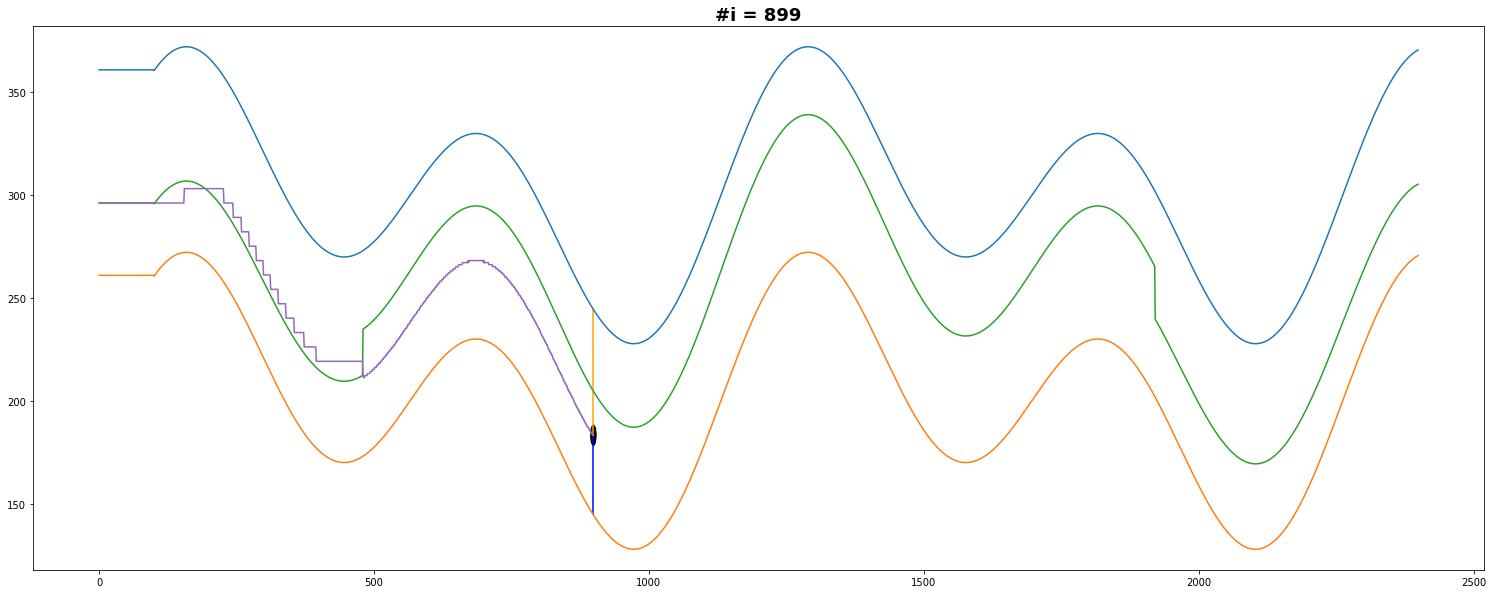

In [63]:
# Nem post plotter, hanem az auto.plot_history(flag = 1)
testAuto.plot_history(1)

self.distance_right_from_wall =  -38.75459444030207
self.distance_left_from_wall  =  -61.24540555969793


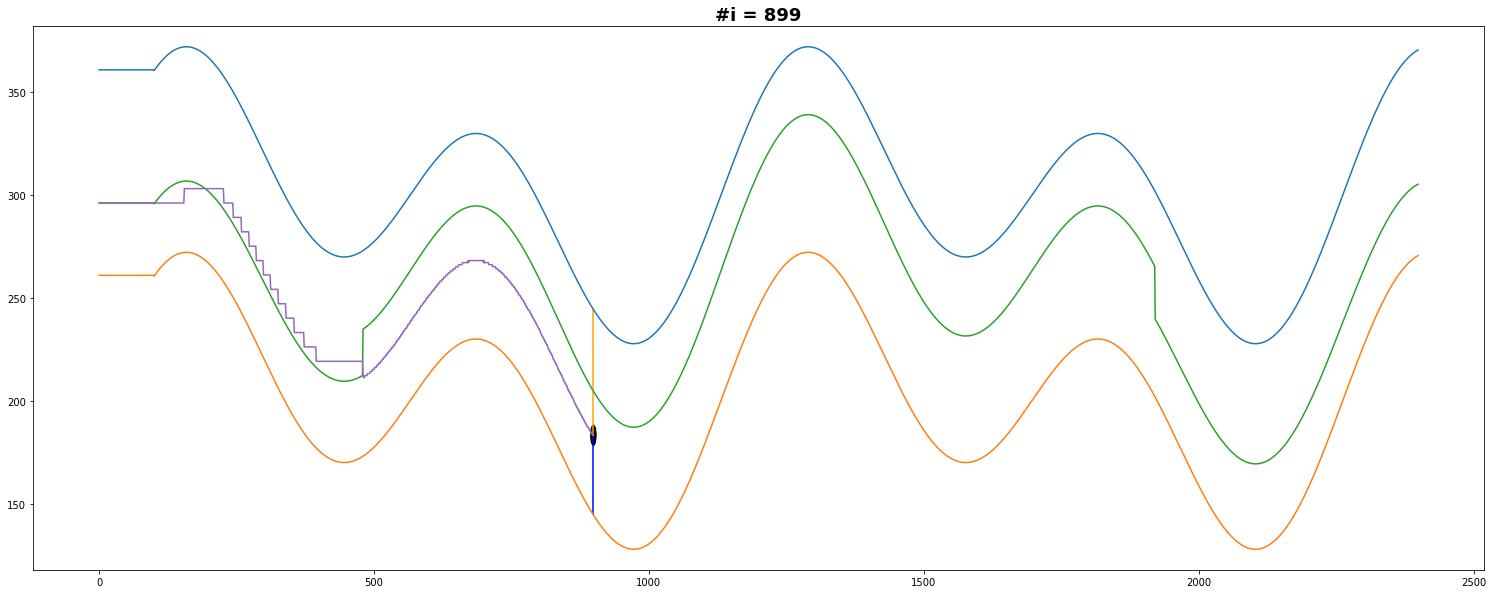

In [64]:
# Nem post plotter, hanem az auto.plot_history(flag = 1)
testAuto.plot_history(1)

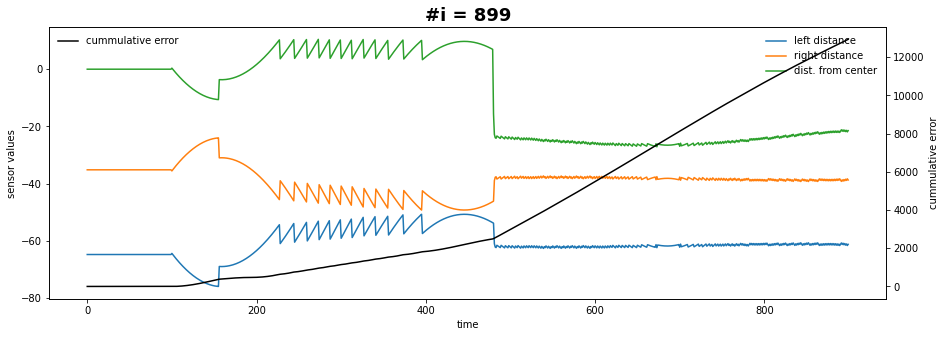

In [65]:
testAuto.plotter.test_plot2(testAuto.sensor_left, testAuto.sensor_right, testAuto.y_distance, testAuto.x, 1, [99])

In [66]:
# cummulativ error utolsó értéke

print(
    np.cumsum(np.abs(testAuto.y_distance))[-1]
)


# max legnagyobb lépés a futás során

tmp = np.diff(np.array(testAuto.y_history), 1, -1, prepend=0)
tmp[0] = 0
max_action_value = np.array(tmp).max()
print(
    max_action_value
)

12928.828929868687
7.0


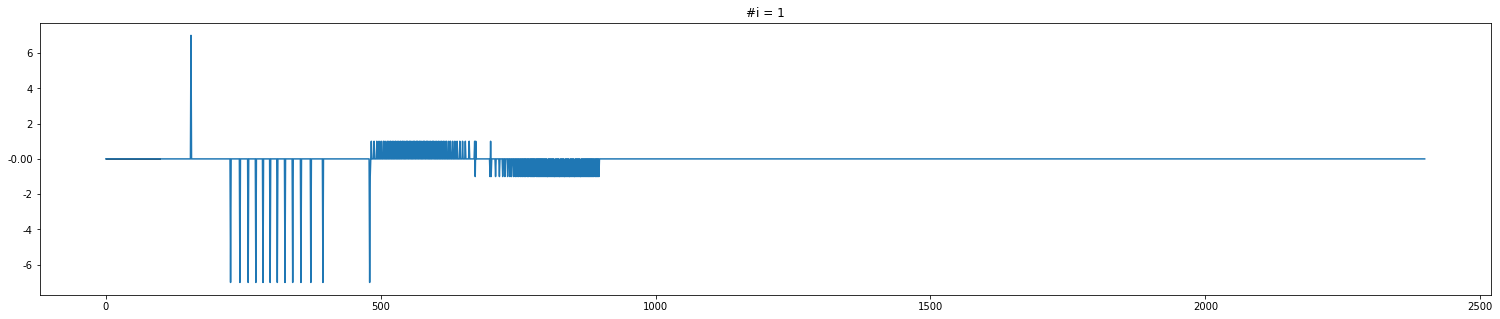

In [67]:
postPlotter = PostPlotter(testAuto)
postPlotter.plot_y_move_v2(car = testAuto, x = 1, flag = 1, height = 5)

# Legacy
# testAuto.plotter.plot_y_move(testAuto.y_history, testAuto.x, 1)

In [68]:
%%capture
! rm images.zip
! zip -0 images.zip *.png

# Csak a Google Colabon használom
# files.download('images.zip')

create_animated_mp4('test_history*.png', 'ani_', framerate=10)

%%capture
! zip -0 ani.zip *.mp4

# Csak a Google Colabon használom
# files.download('ani.zip')

<a name="irodalom"></a>

# Felhasznált irodalom és internetes cimek

Itt gyűjtöttem össze a menet közben összegyűjt okosságokat

[vissza a tartalomhoz](#tartalom)<br>


Random Walk - Wikipedia
<br>
https://en.wikipedia.org/wiki/Random_walk

Random Walks : The Properties, Applications
and Methods of Analysis
<br>
https://fse.studenttheses.ub.rug.nl/22617/1/bMATH_2020_HillAF.pdf


Black–Scholes model
<br>
https://en.wikipedia.org/wiki/Black%E2%80%93Scholes_model


Share price
<br>
https://en.wikipedia.org/wiki/Share_price

Correlations in Economic Time Series
<br>
https://arxiv.org/abs/cond-mat/9706021


Self-similar process
<br>
https://en.wikipedia.org/wiki/Self-similar_process


Heavy-tailed distribution
<br>
https://en.wikipedia.org/wiki/Heavy-tailed_distribution


Seven states of randomness
<br>
https://en.wikipedia.org/wiki/Seven_states_of_randomness


The Black Swan: The Impact of the Highly Improbable
<br>
https://en.wikipedia.org/wiki/The_Black_Swan:_The_Impact_of_the_Highly_Improbable


Long tail
<br>
https://en.wikipedia.org/wiki/Long_tail


Gauss–Markov process
<br>
https://en.wikipedia.org/wiki/Gauss%E2%80%93Markov_process


Probability theory
<br>
https://en.wikipedia.org/wiki/Probability_theory


Time series
<br>
https://en.wikipedia.org/wiki/Time_series


Forecasting
<br>
https://en.wikipedia.org/wiki/Forecasting


Bernoulli process
<br>
https://en.wikipedia.org/wiki/Bernoulli_process


Binomiális tétel
<br>
https://hu.wikipedia.org/wiki/Binomi%C3%A1lis_t%C3%A9tel


Pascal-háromszög
<br>
https://hu.wikipedia.org/wiki/Pascal-h%C3%A1romsz%C3%B6g


Binomiális együttható
<br>
https://hu.wikipedia.org/wiki/Binomi%C3%A1lis_egy%C3%BCtthat%C3%B3


Bachelier model
<br>
https://en.wikipedia.org/wiki/Bachelier_model


Louis Bachelier
<br>
https://en.wikipedia.org/wiki/Louis_Bachelier


Wiener process
<br>
https://en.wikipedia.org/wiki/Wiener_process


Gaussian process
<br>
https://en.wikipedia.org/wiki/Gaussian_process


Markov additive process
<br>
https://en.wikipedia.org/wiki/Markov_additive_process


Olvasmány - éé
<br>
https://thesublimeblog.org/2020/07/29/games-of-chance-i-how-probability-revolutionalized-finance/


Olvasmány - Louis Bachelier's "Theory of Speculation"
<br>
https://f-origin.hypotheses.org/wp-content/blogs.dir/1596/files/2014/12/Mark-Davis-Talk.pdf


------------

Scikit-learn - MLPRegressor API
<br>
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html


Fogalmak és probléma meghatározás
<br>
https://www.rubrik.com/blog/architecture/20/12/customized-autoscaling--minimize-your-cloud-cost


https://github.com/kubernetes/autoscaler/blob/master/cluster-autoscaler/FAQ.md#what-are-the-parameters-to-ca

https://arxiv.org/pdf/1608.04030.pdf

Metrikák amivel a szollgáltatás minőségét mérik különböző esetekben
<br>
https://blog.avinetworks.com/autoscaling-metrics

------------

NumPy API Reference Guide
<br>
https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html


Seaborn API Reference Guide
<br>
https://seaborn.pydata.org/examples/pair_grid_with_kde.html


Python Logger API Reference Guide
<br>
https://docs.python.org/3/howto/logging-cookbook.html#logging-cookbook


Python Logger API Tutorial
<br>
https://coralogix.com/blog/python-logging-best-practices-tips


PyPlot Colorbar Tutorial
<br>
https://matplotlib.org/stable/tutorials/colors/colorbar_only.html


PyPlot Subplot Tutorial
<br>
https://jakevdp.github.io/PythonDataScienceHandbook/04.07-customizing-colorbars.html


Scikit Learn ONYX Save model
<br>
http://onnx.ai/sklearn-onnx


Scikit Learn Save Model
<br>
https://stackabuse.com/scikit-learn-save-and-restore-models

------------

Scikit learn API Warm_start and Partial_fit
<br>
https://newbedev.com/what-is-the-difference-between-partial-fit-and-warm-start


Online learning
<br>
https://www.dummies.com/programming/big-data/data-science/tips-for-dealing-with-big-data-in-python/


Online learning
<br>
https://dziganto.github.io/data%20science/online%20learning/python/scikit-learn/An-Introduction-To-Online-Machine-Learning/


------------

Huber Loss
<br>
https://en.wikipedia.org/wiki/Huber_loss


Gradient Descent - van benne egy tök jó animáció - emlékszem amikor az első ilyet írtam 10 éve
<br>
https://en.wikipedia.org/wiki/Gradient_descent


Online Learning
<br>
https://en.wikipedia.org/wiki/Online_machine_learning


Ezen tök jól lehet demonstrálni, hogy miért tanul gyorsan a 'relu', gyorsabban a 'tanh' és lassan a 'logistic' azonos beállítások mellett, habár végül midhárom közel azonos eredményre vezet
<br>
https://playground.tensorflow.org

-------------------

Wow
<br>
https://matplotlib.org/devdocs/gallery/mplot3d/voxels_numpy_logo.html

Wow - Nice Pyplot Graphics
<br>
<a href="https://www.google.com/imgres?imgurl=https%3A%2F%2Fi.stack.imgur.com%2F0FSLf.png&imgrefurl=https%3A%2F%2Fstackoverflow.com%2Fquestions%2F48672663%2Fmatplotlib-render-all-internal-voxels-with-alpha&tbnid=ug0Bk5AvbBFGoM&vet=12ahUKEwiF_vrC0d7zAhUfiv0HHZkkCD4QxiAoA3oECAAQIw..i&docid=lv23pEYcw_qlvM&w=465&h=367&itg=1&q=pyplot%203d%20plot%20wall&ved=2ahUKEwiF_vrC0d7zAhUfiv0HHZkkCD4QxiAoA3oECAAQIw">Google search</a>

Wow - Nice Pyplot Graphics
<br>
<a href="https://www.google.com/imgres?imgurl=https%3A%2F%2Fi.stack.imgur.com%2FvLogW.png&imgrefurl=https%3A%2F%2Fstackoverflow.com%2Fquestions%2F48672663%2Fmatplotlib-render-all-internal-voxels-with-alpha&tbnid=jmhk8RQrADn_iM&vet=12ahUKEwivwqC44d7zAhUH8LsIHWVICYkQxiAoAHoECAAQEQ..i&docid=lv23pEYcw_qlvM&w=428&h=352&itg=1&q=pyplot%203d%20plot%20wall&ved=2ahUKEwivwqC44d7zAhUH8LsIHWVICYkQxiAoAHoECAAQEQ">Google search</a>

Wow - Nice Pyplot Graphics
<br>
<a href="https://www.google.com/imgres?imgurl=https%3A%2F%2Fwww.researchgate.net%2Fprofile%2FAndrew-Thompson-21%2Fpublication%2F256099533%2Ffigure%2Ffig2%2FAS%3A601596220153863%401520443124187%2FThree-possible-2D-views-of-a-3D-surface-representing-the-response-to-two-drugs-A.png&imgrefurl=https%3A%2F%2Fwww.researchgate.net%2Ffigure%2FThree-possible-2D-views-of-a-3D-surface-representing-the-response-to-two-drugs-A_fig2_256099533&tbnid=PCWbaGIBwOUEqM&vet=12ahUKEwjU5bet0d7zAhUZ8rsIHQuQDVAQxiAoBXoECAAQGQ..i&docid=sbOccjnKSDRdPM&w=850&h=1014&itg=1&q=pyplot%203d%20plot%20wall&ved=2ahUKEwjU5bet0d7zAhUZ8rsIHQuQDVAQxiAoBXoECAAQGQ">Google search</a>

Science Plots for Academic Papers
<br>
https://github.com/garrettj403/SciencePlots

-----------

PyPlot - Memory issue and its solution
<br>
https://www.py4u.net/discuss/208758

```
JoDeMiro - What else^^^˘˘°°˛˛˛
```